In [153]:
# importing the important libraries.
import pandas as pd
import warnings
warnings.simplefilter('ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
# Read the message activity data and preview
msg_df = pd.read_excel('MessageActivity_2020-8-20_1024.xlsx',delimiter =',')
msg_df.head()

Hub Id                         Hub Name  total_messages  \
0     844                       NetworkUSF            2260   
1     370            Tri-Mentoring Program           28942   
2       3  Stanford Alumni Mentoring (SAM)           25120   
3      19                   Trojan Network           15917   
4     553         The UofSC Mentorship Hub             553   

   last_week_messages  last_month_messages  last_quarter_messages  
0                 857                 1447                   2195  
1                 726                 3110                   4648  
2                 683                 2134                   5125  
3                 659                 2353                   6641  
4                 468                  534                    553

In [155]:
# Read the sigunp activity data and preview

signup_df = pd.read_excel('SignupActivity_2020-8-20_1025.xlsx')
signup_df.tail()

Hub Id                      Hub Name  imported_users  joined_users  \
624     207           Clemson Engineering             1.0         108.0   
625     568                    test5535_2             0.0           4.0   
626     205  demo Clemson Business School             1.0         110.0   
627     945                 Hydra Connect             0.0           9.0   
628     486         Support Team Connect              6.0          23.0   

     last_week_joined  last_month_joined  last_quarter_joined  
624               0.0                0.0                  0.0  
625               0.0                0.0                  0.0  
626               0.0                0.0                  0.0  
627               0.0                0.0                  0.0  
628               0.0                0.0                  0.0

In [156]:
# Read the admin activity data and preview

admin_df = pd.read_excel('AdminActivity_2020-8-20_1023.xlsx',parse_dates=['Last Admin Login'])
admin_df.sample(5)

id                                         name  Number of Admins  \
502  162                             CWRU Med Connect               2.0   
332  675                               Violet Network              21.0   
485  371                       Career Advisor Network              11.0   
620   27  Strayer University Peer to Peer Winter 2017               6.0   
519  870                                   Random Hub              14.0   

    Last Admin Login  Last Week Admin Logins  Last Month Admin Logins  \
502       2020-08-11                     0.0                     44.0   
332       2020-08-19                   347.0                   1496.0   
485       2020-08-17                    22.0                    100.0   
620       2018-03-20                     0.0                      0.0   
519       2020-08-09                     0.0                     13.0   

     Last Quarter Admin Logins  
502                      197.0  
332                     6111.0  
485                      426.0  
620                        0.0  
519                       43.0

### Since there are null columns for each of the tables and data points as well as feature values are missing . Thus , merging all the data sets on hub_id so that all data can be together and collated for analysis.

In [157]:
req_df= pd.merge(admin_df,msg_df,left_on='id',right_on='Hub Id')
req_df.head()

id                         name  Number of Admins Last Admin Login  \
0    1       Campuskudos University               1.0              NaT   
1  109   Georgetown College Connect               1.0              NaT   
2  111  Yeshiva of Flatbush Connect               NaN              NaT   
3  160                 SLAC Connect               1.0              NaT   
4  165       Intuit Women's Network               NaN              NaT   

   Last Week Admin Logins  Last Month Admin Logins  Last Quarter Admin Logins  \
0                     NaN                      NaN                        NaN   
1                     NaN                      NaN                        NaN   
2                     NaN                      NaN                        NaN   
3                     NaN                      NaN                        NaN   
4                     NaN                      NaN                        NaN   

   Hub Id                     Hub Name  total_messages  last_week_messages  \
0       1       Campuskudos University              13                   0   
1     109   Georgetown College Connect              13                   0   
2     111  Yeshiva of Flatbush Connect              26                   0   
3     160                 SLAC Connect               4                   0   
4     165       Intuit Women's Network             105                   0   

   last_month_messages  last_quarter_messages  
0                    0                      0  
1                    0                      0  
2                    0                      0  
3                    0                      0  
4                    0                      0

In [158]:
df_all  = pd.merge(signup_df,req_df,left_on='Hub Id',right_on='id')
df_all.head()

Hub Id_x        Hub Name_x  imported_users  joined_users  last_week_joined  \
0       861     OneHop Alumni        136779.0        4956.0             867.0   
1       379      Pitt Commons        259028.0       10824.0             743.0   
2        19    Trojan Network        183508.0       17820.0             632.0   
3       844        NetworkUSF         59574.0        3814.0             612.0   
4       889  UW Husky Landing        359360.0        1737.0             528.0   

   last_month_joined  last_quarter_joined   id              name  \
0             1343.0               3709.0  861     OneHop Alumni   
1             1090.0               2210.0  379      Pitt Commons   
2             1503.0               3798.0   19    Trojan Network   
3             1395.0               2670.0  844        NetworkUSF   
4             1247.0               1258.0  889  UW Husky Landing   

   Number of Admins Last Admin Login  Last Week Admin Logins  \
0               8.0       2020-08-19                   254.0   
1              29.0       2020-08-20                   444.0   
2              13.0       2020-08-20                   558.0   
3               5.0       2020-08-20                   872.0   
4              10.0       2020-08-19                   263.0   

   Last Month Admin Logins  Last Quarter Admin Logins  Hub Id_y  \
0                    931.0                     4120.0       861   
1                   1121.0                     2542.0       379   
2                   1345.0                     3946.0        19   
3                   2903.0                     4783.0       844   
4                   1382.0                     3269.0       889   

         Hub Name_y  total_messages  last_week_messages  last_month_messages  \
0     OneHop Alumni             489                  95                  237   
1      Pitt Commons            7473                 241                  476   
2    Trojan Network           15917                 659                 2353   
3        NetworkUSF            2260                 857                 1447   
4  UW Husky Landing             207                 113                  204   

   last_quarter_messages  
0                    488  
1                   1609  
2                   6641  
3                   2195  
4                    207

In [159]:
finaldf = df_all.drop(['Hub Id_x', 'Hub Name_x','Hub Id_y', 'Hub Name_y'],1)

### It can be seen that same name of hub there are different Id but with different timeline for admin login.
### Thus removing the duplicate data and keeping the latest one.

In [160]:
finaldf = finaldf.drop_duplicates(subset=['name'],keep='first')

In [161]:
finaldf[finaldf.duplicated()==True].shape

(0, 16)

In [162]:
finaldf.isna().sum()

imported_users                0
joined_users                  0
last_week_joined              0
last_month_joined             0
last_quarter_joined           0
id                            0
name                          0
Number of Admins             14
Last Admin Login             23
Last Week Admin Logins       23
Last Month Admin Logins      23
Last Quarter Admin Logins    23
total_messages                0
last_week_messages            0
last_month_messages           0
last_quarter_messages         0
dtype: int64

In [163]:
finaldf = finaldf.dropna()

In [164]:
finaldf = finaldf.sort_values(by='Last Admin Login',ascending=False)

In [165]:
df = finaldf.copy()

In [166]:
def return_original_hubs(row):
    row['name']=row['name'].replace('\`','',regex=True)

    list_of_test_hubs = ['TFA QA','Caitlin Connect','PG SAM Training','PG UCN Training','Multi Hub1 Connect','Multi Hub2 Connect',
                     'Multi Hub3 Connect','Antonia Connect','Kelly Connect'
                     'Melissa Connect','Copyable Program Only','SAM Copyable Hub','UCN Copyable Hub'
                     'PEP Copyable Hub','UCN + Program Copyable Hub','Jon Connect','Vaishnavi','shraddhapg','siddhesh','k8s-prod-hub']

    hub_names = []
    for hub_name in row['name']:
        if  'test' in str(hub_name).lower() or 'demo' in str(hub_name).lower() or hub_name in list_of_test_hubs :
            hub_names.append(hub_name)
    return hub_names
           
df = df[~(df['name'].isin(return_original_hubs(df)))]

In [167]:
import datetime as dt
df['month'] = df['Last Admin Login'].dt.month
df['day'] = df['Last Admin Login'].dt.day
df['year'] = df['Last Admin Login'].dt.year

In [168]:
#Admin Activity : 
#This defines the on an average activity(login) of the single admin in a particular hub for a week/month/quarter.
#This will be used for comparative analysis with message and signup activity.
df['admin_activity_week'] = df['Last Week Admin Logins']/df['Number of Admins']
df['admin_activity_month'] = df['Last Month Admin Logins']/df['Number of Admins']
df['admin_activity_quarter'] = df['Last Quarter Admin Logins']/df['Number of Admins']





In [171]:
#Messaging Rate wrt Users : 
#This defines the number of messages sent with respect to the number of users joined for week/month/quarter 
#and total(total messages/total users [imported+joined]) for each hub
df['messaging_rate_week_users'] = df['last_week_messages']/df['last_week_joined']
df['messaging_rate_month_users'] = df['last_month_messages']/df['last_month_joined']
df['messaging_rate_quarter_users'] = df['last_quarter_messages']/df['last_quarter_joined']
df['messaging_rate_users'] = df['total_messages']/(df['imported_users']+df['joined_users'])

In [172]:

#Messaging Rate wrt Admins Explicit : 
#This defines the number of messages sent with respect to the number of admins login for week/month/quarter .
df['messaging_rate_week_admin'] = df['last_week_messages']/df['Last Week Admin Logins']
df['messaging_rate_month_admin'] = df['last_month_messages']/df['Last Month Admin Logins']
df['messaging_rate_quarter_admin'] = df['last_quarter_messages']/df['Last Quarter Admin Logins']

In [173]:
#Sign-Up Rate wrt Admins :
#This defines the number of users joined with respect to number of admin logins for week/month/quarter.
df['signup_rate_week'] = df['last_week_joined']/df['Last Week Admin Logins']
df['signup_rate_month'] = df['last_month_joined']/df['Last Month Admin Logins']
df['signup_rate_quarter'] = df['last_quarter_joined']/df['Last Quarter Admin Logins']


In [174]:
df.head()

imported_users  joined_users  last_week_joined  last_month_joined  \
168          1234.0        4083.0               6.0               37.0   
45           4348.0         415.0              62.0              120.0   
173         35612.0        1331.0               6.0               36.0   
50           8049.0        1565.0              54.0              644.0   
191          2512.0         176.0               5.0               26.0   

     last_quarter_joined   id                     name  Number of Admins  \
168                126.0  327  Teach for India Connect               6.0   
45                 134.0  668              CVM Connect               7.0   
173                165.0  493              GGU Connect              20.0   
50                 820.0  855          Bronco Exchange              16.0   
191                 79.0  606              IBC Connect               5.0   

    Last Admin Login  Last Week Admin Logins  ...  messaging_rate_week_admin  \
168       2020-08-20                    74.0  ...                   0.837838   
45        2020-08-20                   219.0  ...                   0.109589   
173       2020-08-20                   130.0  ...                   0.338462   
50        2020-08-20                   210.0  ...                   1.009524   
191       2020-08-20                   121.0  ...                   0.107438   

     messaging_rate_month_admin  messaging_rate_quarter_admin  \
168                    0.647638                      0.446574   
45                     0.039578                      0.049498   
173                    0.238281                      0.158200   
50                     0.563858                      0.364992   
191                    0.062350                      0.051643   

     messaging_rate_week_users  messaging_rate_month_users  \
168                  10.333333                    8.891892   
45                    0.387097                    0.375000   
173                   7.333333                    3.388889   
50                    3.925926                    2.296584   
191                   2.600000                    1.000000   

     messaging_rate_quarter_users  messaging_rate_users  signup_rate_week  \
168                      7.396825              1.809103          0.081081   
45                       1.029851              0.062146          0.283105   
173                      1.981818              0.035650          0.046154   
50                       2.179268              0.247764          0.257143   
191                      0.696203              0.040179          0.041322   

     signup_rate_month  signup_rate_quarter  
168           0.072835             0.060374  
45            0.105541             0.048063  
173           0.070312             0.079826  
50            0.245520             0.167484  
191           0.062350             0.074178  

[5 rows x 32 columns]

In [175]:
most_active_hub = df[df['name'].isin(most_active_hubs)]
most_active_hub

imported_users  joined_users  last_week_joined  last_month_joined  \
102           425.0        2742.0              18.0               67.0   
107        131369.0          33.0              17.0               17.0   
177            64.0         318.0               6.0               18.0   
7          455104.0       72360.0             312.0              845.0   
26           3559.0         529.0              81.0              418.0   
11          33174.0       20015.0             167.0              486.0   
10         127535.0        1146.0             219.0              823.0   
132          8117.0          31.0              12.0               17.0   

     last_quarter_joined   id                                     name  \
102                134.0  297                      HELPS Buddy Program   
107                 25.0  909                       UCR Career Network   
177                 19.0  299  Transition and Academic Support Program   
7                 5315.0   39                         UMGC CareerQuest   
26                 431.0  325                              LSA Connect   
11                1092.0  310                       ASU Mentor Network   
10                 842.0  916                        Bearcats Connect    
132                 27.0  903                              Olive Grove   

     Number of Admins Last Admin Login  Last Week Admin Logins  ...  \
102               9.0       2020-08-20                   281.0  ...   
107               5.0       2020-08-20                    85.0  ...   
177               9.0       2020-08-20                   146.0  ...   
7                37.0       2020-08-20                   791.0  ...   
26               14.0       2020-08-20                   755.0  ...   
11               43.0       2020-08-19                   497.0  ...   
10               10.0       2020-08-19                   616.0  ...   
132               5.0       2020-08-19                   318.0  ...   

     messaging_rate_week_admin  messaging_rate_month_admin  \
102                   0.690391                    0.679764   
107                   0.058824                    0.026455   
177                   0.760274                    0.454229   
7                     0.250316                    0.339777   
26                    0.162914                    0.109845   
11                    0.607646                    0.389721   
10                    0.092532                    0.053974   
132                   0.034591                    0.018225   

     messaging_rate_quarter_admin  messaging_rate_week_users  \
102                      0.705954                  10.777778   
107                      0.023715                   0.294118   
177                      0.492003                  18.500000   
7                        0.530839                   0.634615   
26                       0.081223                   1.518519   
11                       0.425765                   1.808383   
10                       0.048561                   0.260274   
132                      0.014049                   0.916667   

     messaging_rate_month_users  messaging_rate_quarter_users  \
102                   10.328358                     13.007463   
107                    0.294118                      0.720000   
177                   21.777778                     40.473684   
7                      1.372781                      1.016933   
26                     0.899522                      0.900232   
11                     1.606996                      1.885531   
10                     0.198056                      0.198337   
132                    1.352941                      1.037037   

     messaging_rate_users  signup_rate_week  signup_rate_month  \
102              5.625513          0.064057           0.065815   
107              0.000137          0.200000           0.089947   
177             15.664921          0.041096           0.020857   
7                0.088097          0.394437  

### Question 1) Which hubs have the ten most active admins? 
### Define activity as WAU (logins per week)


In [176]:
most_active_hubs = ['HELPS Buddy Program', 'ASU Mentor Network', 'Olive Grove',
       'UMGC CareerQuest', 'Bearcats Connect ', 'UCR Career Network',
       'Transition and Academic Support Program', 'LSA Connect']

In [177]:

# most_active_hub = df.groupby(['name','Last Admin Login']).agg({'Number of Admins':'sum','admin_activity_week':'mean','admin_activity_month':'mean','admin_activity_quarter':'mean'}).sort_values(by=['admin_activity_week'],ascending=[False]).head(10).reset_index()#.values[0:2]
# #print(f'Hub having the ten most active admins: {most_active_hub}')
# most_active_hub

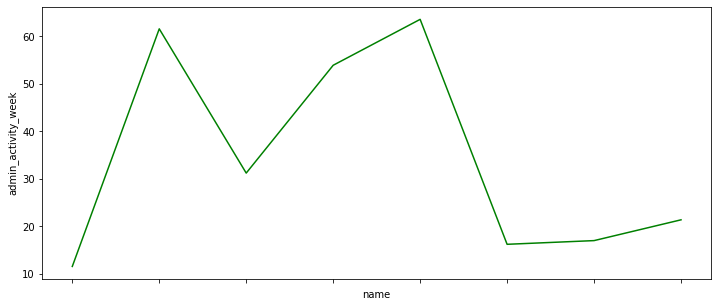

In [178]:
plt.figure(figsize=(12,5))
ax = sns.lineplot(most_active_hub['name'],most_active_hub['admin_activity_week'],color='green')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

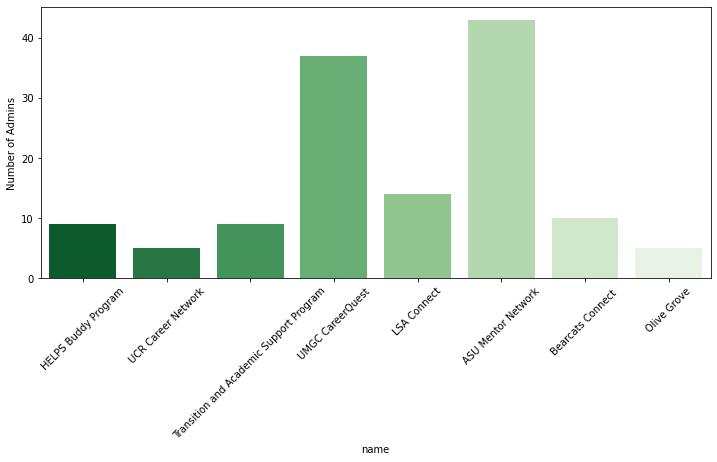

In [179]:
plt.figure(figsize=(12,5))

ax= sns.barplot(most_active_hub['name'],most_active_hub['Number of Admins'],palette='Greens_r')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

In [32]:

least_active_hubs =df.groupby(['name','Last Admin Login']).agg({'Number of Admins':'sum','admin_activity_week':'mean','admin_activity_month':'mean','admin_activity_quarter':'mean'}).sort_values(by=['admin_activity_week'],ascending=[False]).tail(10).reset_index()#.values[0:2]
#print(f'Hub having the ten most active admins: {most_active_hub}')
least_active_hubs

name Last Admin Login  Number of Admins  \
0                         Random Hub       2020-08-09              14.0   
1  Ramaz Alumni Professional Network       2019-10-24               4.0   
2                      QUT Mentoring       2020-06-02               3.0   
3           Purdue Chemistry Connect       2020-05-07               1.0   
4                PeopleGrove Sandbox       2020-06-15               6.0   
5     UNLV - NAU Mentoring Community       2017-09-25               1.0   
6            USC Social Work Connect       2020-08-04               6.0   
7                      PeddieConnect       2020-07-27              10.0   
8                          UT System       2020-07-17               3.0   
9                Clemson Engineering       2020-07-22               6.0   

   admin_activity_week  admin_activity_month  admin_activity_quarter  
0                  0.0              0.928571                3.071429  
1                  0.0              0.000000                0.000000  
2                  0.0              0.000000              137.666667  
3                  0.0              0.000000                0.000000  
4                  0.0              0.000000                3.166667  
5                  0.0              0.000000                0.000000  
6                  0.0              0.666667                1.000000  
7                  0.0              0.100000                2.600000  
8                  0.0              0.000000                3.666667  
9                  0.0              1.833333                1.833333

## Question 2) What is the “normal" level of admin activity, across all hubs?
## What is average number of logins per week / month? How does this compare over time?


In [33]:
df.head()

imported_users  joined_users  last_week_joined  last_month_joined  \
168          1234.0        4083.0               6.0               37.0   
45           4348.0         415.0              62.0              120.0   
173         35612.0        1331.0               6.0               36.0   
50           8049.0        1565.0              54.0              644.0   
191          2512.0         176.0               5.0               26.0   

     last_quarter_joined   id                     name  Number of Admins  \
168                126.0  327  Teach for India Connect               6.0   
45                 134.0  668              CVM Connect               7.0   
173                165.0  493              GGU Connect              20.0   
50                 820.0  855          Bronco Exchange              16.0   
191                 79.0  606              IBC Connect               5.0   

    Last Admin Login  Last Week Admin Logins  ...  messaging_rate_week_users  \
168       2020-08-20                    74.0  ...                  10.333333   
45        2020-08-20                   219.0  ...                   0.387097   
173       2020-08-20                   130.0  ...                   7.333333   
50        2020-08-20                   210.0  ...                   3.925926   
191       2020-08-20                   121.0  ...                   2.600000   

     messaging_rate_month_users  messaging_rate_quarter_users  \
168                    8.891892                      7.396825   
45                     0.375000                      1.029851   
173                    3.388889                      1.981818   
50                     2.296584                      2.179268   
191                    1.000000                      0.696203   

     messaging_rate_users  messaging_rate_week_admin  \
168              1.809103                   0.837838   
45               0.062146                   0.109589   
173              0.035650                   0.338462   
50               0.247764                   1.009524   
191              0.040179                   0.107438   

     messaging_rate_month_admin  messaging_rate_quarter_admin  \
168                    0.647638                      0.446574   
45                     0.039578                      0.049498   
173                    0.238281                      0.158200   
50                     0.563858                      0.364992   
191                    0.062350                      0.051643   

     signup_rate_week  signup_rate_month  signup_rate_quarter  
168          0.081081           0.072835             0.060374  
45           0.283105           0.105541             0.048063  
173          0.046154           0.070312             0.079826  
50           0.257143           0.245520             0.167484  
191          0.041322           0.062350             0.074178  

[5 rows x 32 columns]

In [34]:
print('Average Number of Login last Quarter:',df['admin_activity_quarter'].median())
print('Average Number of Login last Week:',df['admin_activity_week'].median())
print('Average Number of Login last Month:',df['admin_activity_month'].median())

Average Number of Login last Quarter: 81.5
Average Number of Login last Week: 5.5
Average Number of Login last Month: 26.22222222222222


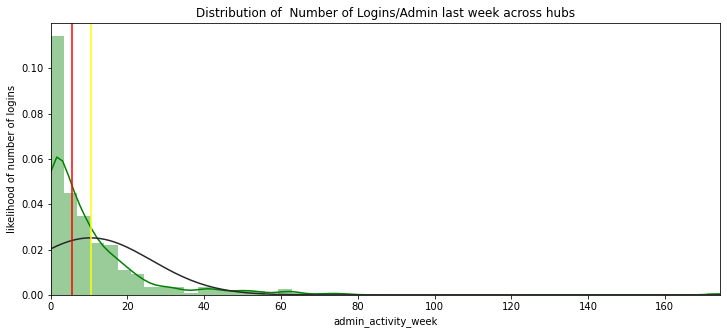

In [35]:
from scipy.stats import norm
plt.figure(figsize=(12,5))
plt.xlim(0.0,df['admin_activity_week'].max())
ax= sns.distplot(df['admin_activity_week'],fit=norm,color='green')
ax.axvline(df['admin_activity_week'].median(),color='red')
ax.axvline(df['admin_activity_week'].mean(),color='yellow')
plt.ylabel('likelihood of number of logins')
plt.title('Distribution of  Number of Logins/Admin last week across hubs')
plt.show()

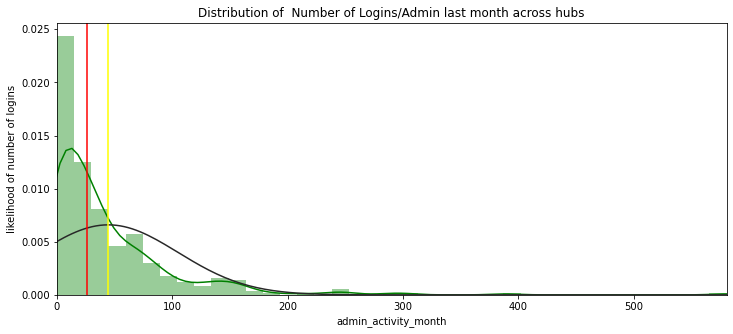

In [36]:
from scipy.stats import norm
plt.figure(figsize=(12,5))
plt.xlim(0.0,df['admin_activity_month'].max())
ax= sns.distplot(df['admin_activity_month'],fit=norm,color='green')
ax.axvline(df['admin_activity_month'].median(),color='red')
ax.axvline(df['admin_activity_month'].mean(),color='yellow')
plt.ylabel('likelihood of number of logins')
plt.title('Distribution of  Number of Logins/Admin last month across hubs')
plt.show()

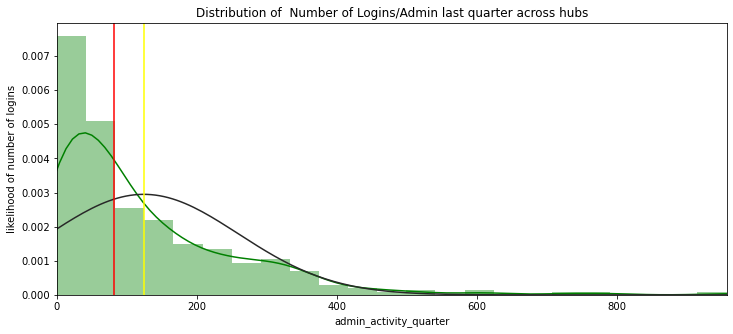

In [37]:
from scipy.stats import norm
plt.figure(figsize=(12,5))
plt.xlim(0.0,df['admin_activity_quarter'].max())
ax= sns.distplot(df['admin_activity_quarter'],fit=norm,color='green')
ax.axvline(df['admin_activity_quarter'].median(),color='red')
ax.axvline(df['admin_activity_quarter'].mean(),color='yellow')
plt.ylabel('likelihood of number of logins')
plt.title('Distribution of  Number of Logins/Admin last quarter across hubs')
plt.show()

In [38]:
df['week'] = df['Last Admin Login'].dt.week

In [124]:
df_week = df.sort_values(by='Last Week Admin Logins',ascending =False)
df_month = df.sort_values(by='Last Month Admin Logins',ascending =False)
df_quarter = df.sort_values(by='Last Quarter Admin Logins',ascending =False)

In [125]:
df.head()

imported_users  joined_users  last_week_joined  last_month_joined  \
3          59574.0        3814.0             612.0             1395.0   
7         455104.0       72360.0             312.0              845.0   
5           1194.0        9169.0             423.0             1507.0   
66          2434.0        3413.0              37.0              220.0   
26          3559.0         529.0              81.0              418.0   

    last_quarter_joined   id                   name  Number of Admins  \
3                2670.0  844             NetworkUSF               5.0   
7                5315.0   39       UMGC CareerQuest              37.0   
5                2240.0  370  Tri-Mentoring Program              18.0   
66                280.0  533        Honors Carolina              15.0   
26                431.0  325            LSA Connect              14.0   

   Last Admin Login  Last Week Admin Logins  ...  messaging_rate_month_users  \
3        2020-08-20                   872.0  ...                    1.037276   
7        2020-08-20                   791.0  ...                    1.372781   
5        2020-08-20                   765.0  ...                    2.063703   
66       2020-08-19                   758.0  ...                    2.768182   
26       2020-08-20                   755.0  ...                    0.899522   

    messaging_rate_quarter_users  messaging_rate_users  \
3                       0.822097              0.035653   
7                       1.016933              0.088097   
5                       2.075000              2.792821   
66                      4.785714              1.981529   
26                      0.900232              0.216732   

    messaging_rate_week_admin  messaging_rate_month_admin  \
3                    0.982798                    0.498450   
7                    0.250316                    0.339777   
5                    0.949020                    1.431860   
66                   0.201847                    0.270546   
26                   0.162914                    0.109845   

    messaging_rate_quarter_admin  signup_rate_week  signup_rate_month  \
3                       0.458917          0.701835           0.480537   
7                       0.530839          0.394437           0.247510   
5                       0.808207          0.552941           0.693831   
66                      0.253740          0.048813           0.097734   
26                      0.081223          0.107285           0.122115   

    signup_rate_quarter  week  
3              0.558227    34  
7              0.522000    34  
5              0.389497    34  
66             0.053020    34  
26             0.090224    34  

[5 rows x 33 columns]

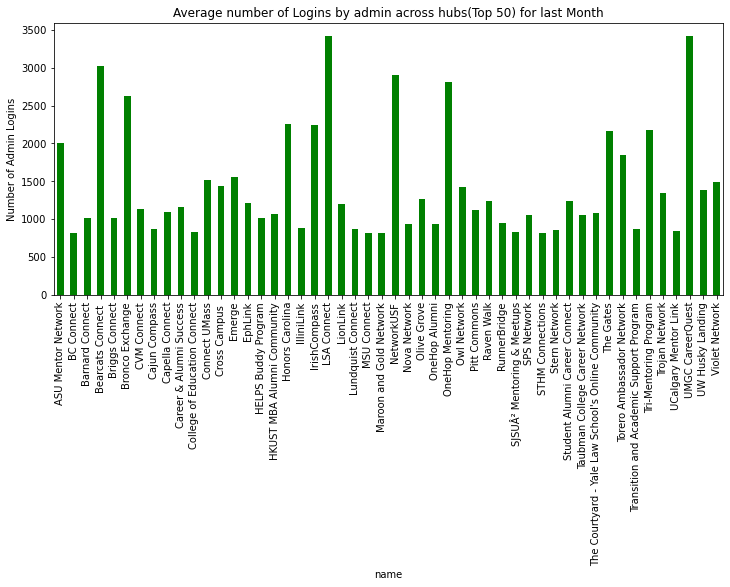

In [131]:
plt.figure(figsize=(12,5))
ax = df_month.head(50).groupby('name')['Last Month Admin Logins'].mean().plot(kind='bar',color='green')
plt.ylabel('Number of Admin Logins')
plt.title('Average number of Logins by admin across hubs(Top 50) for last Month')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

plt.show()

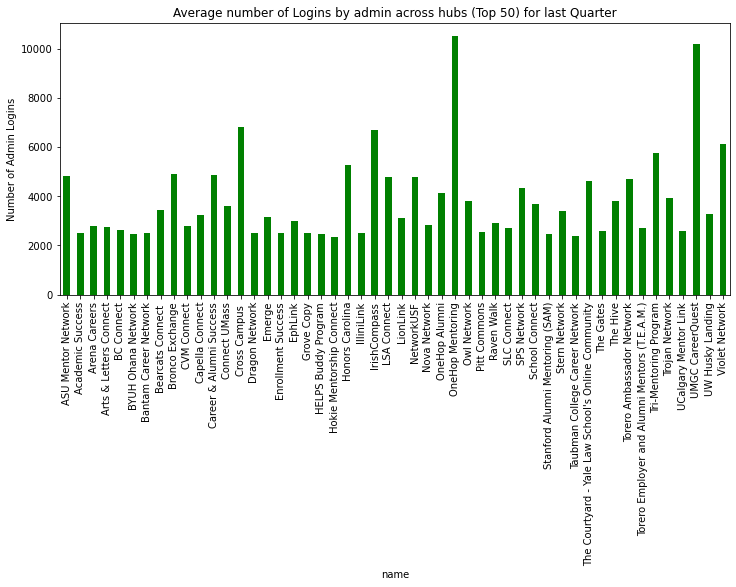

In [129]:
plt.figure(figsize=(12,5))
ax = df_quarter.head(50).groupby('name')['Last Quarter Admin Logins'].median().plot(kind='bar',color='green')
plt.ylabel('Number of Admin Logins')
plt.title('Average number of Logins by admin across hubs (Top 50) for last Quarter')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

plt.show()

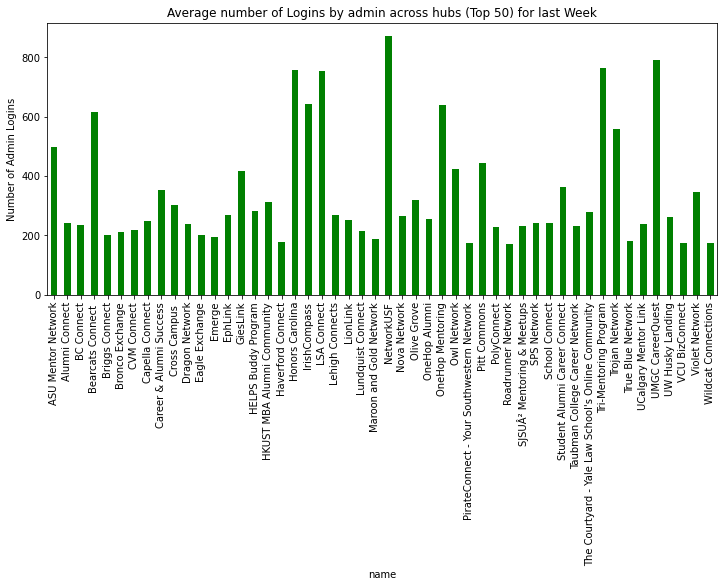

In [133]:
plt.figure(figsize=(12,5))
ax = df_week.head(50).groupby('name')['Last Week Admin Logins'].median().plot(kind='bar',color='green')
plt.ylabel('Number of Admin Logins')
plt.title('Average number of Logins by admin across hubs (Top 50) for last Week')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

plt.show()

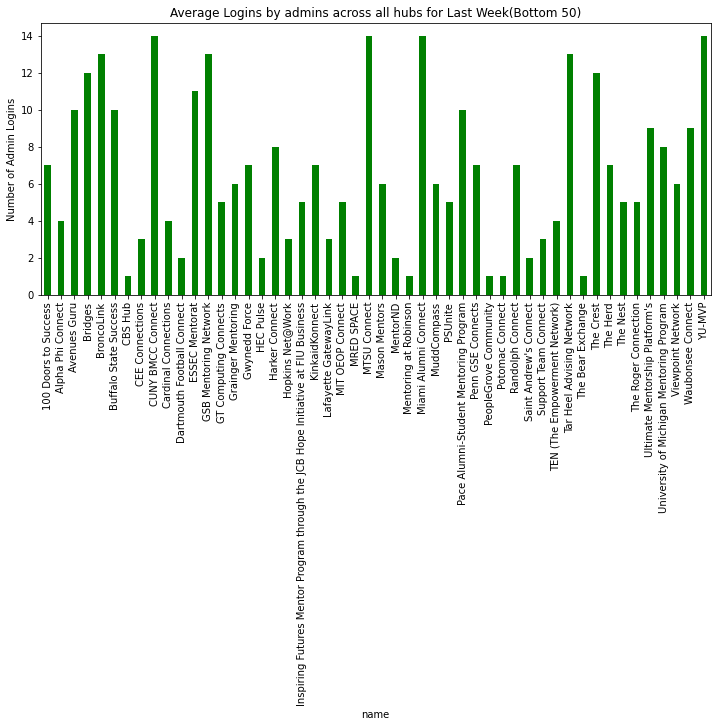

In [134]:
plt.figure(figsize=(12,5))
ax = df_week[df_week['Last Week Admin Logins']>0.0].tail(50).groupby('name')['Last Week Admin Logins'].median().plot(kind='bar',color='green')
plt.ylabel('Number of Admin Logins')
plt.title('Average Logins by admins across all hubs for Last Week(Bottom 50)')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

plt.show()

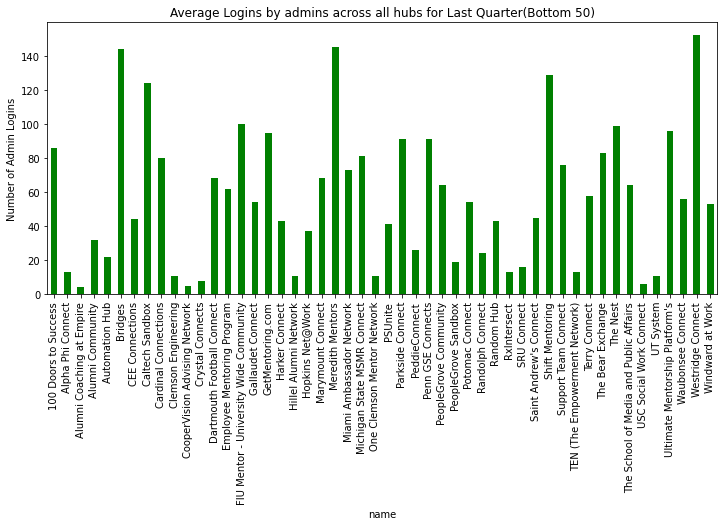

In [135]:
plt.figure(figsize=(12,5))
ax = df_quarter[df_quarter['Last Quarter Admin Logins']>0.0].tail(50).groupby('name')['Last Quarter Admin Logins'].median().plot(kind='bar',color='green')
plt.ylabel('Number of Admin Logins')
plt.title('Average Logins by admins across all hubs for Last Quarter(Bottom 50)')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

plt.show()

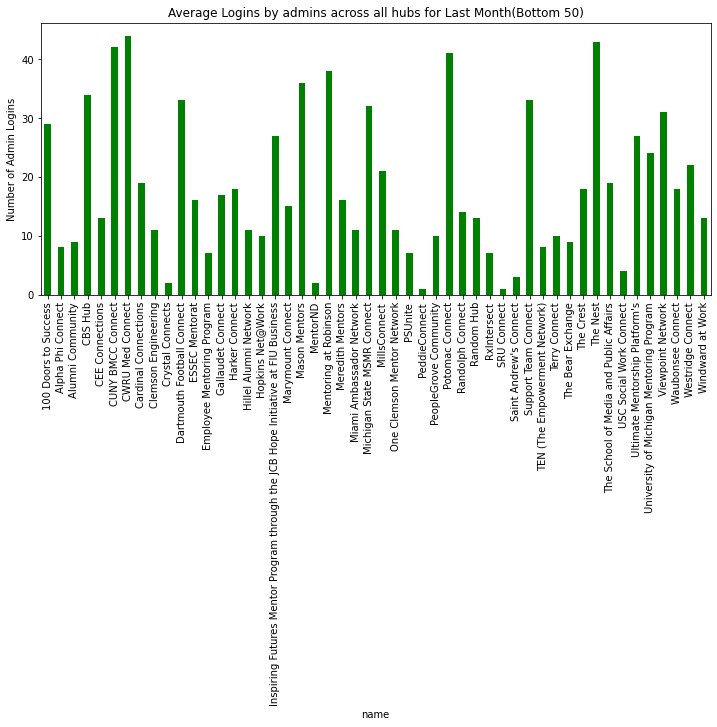

In [136]:
plt.figure(figsize=(12,5))
ax = df_month[df_month['Last Month Admin Logins']>0.0].tail(50).groupby('name')['Last Month Admin Logins'].median().plot(kind='bar',color='green')
plt.ylabel('Number of Admin Logins')
plt.title('Average Logins by admins across all hubs for Last Month(Bottom 50)')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

plt.show()

### Question 3) Do you think there is a correlation between admin activity and message activity in the hub? Why or why not?
### Correlate admin logins with messaging activity

### Question 4) Do you think there is a correlation between admin activity and sign-up          activity in the hub? Why or why not?
### Correlate admin logins with signups


In [141]:
df.columns

Index(['imported_users', 'joined_users', 'last_week_joined',
       'last_month_joined', 'last_quarter_joined', 'id', 'name',
       'Number of Admins', 'Last Admin Login', 'Last Week Admin Logins',
       'Last Month Admin Logins', 'Last Quarter Admin Logins',
       'total_messages', 'last_week_messages', 'last_month_messages',
       'last_quarter_messages', 'month', 'day', 'year', 'admin_activity_week',
       'admin_activity_month', 'admin_activity_quarter',
       'messaging_rate_week_users', 'messaging_rate_month_users',
       'messaging_rate_quarter_users', 'messaging_rate_users',
       'messaging_rate_week_admin', 'messaging_rate_month_admin',
       'messaging_rate_quarter_admin', 'signup_rate_week', 'signup_rate_month',
       'signup_rate_quarter', 'week'],
      dtype='object')

In [142]:
a =['admin_activity_week',
       'admin_activity_month', 'admin_activity_quarter',
       'messaging_rate_week_users', 'messaging_rate_month_users',
       'messaging_rate_quarter_users', 'messaging_rate_users',
       'messaging_rate_week_admin', 'messaging_rate_month_admin',
       'messaging_rate_quarter_admin', 'signup_rate_week', 'signup_rate_month',
       'signup_rate_quarter']

In [146]:
#The test rejects the hypothesis of normality when the p-value is less than or equal to 0.05
from scipy import stats
for i in a:
    shapiro_test = stats.shapiro(df[i])
    print(i,shapiro_test.pvalue)


admin_activity_week 9.884792540049148e-09
admin_activity_month 1.5274395991582423e-05
admin_activity_quarter 0.00015268170682247728
messaging_rate_week_users 1.0
messaging_rate_month_users 1.0
messaging_rate_quarter_users 1.0
messaging_rate_users 3.567358335828046e-17
messaging_rate_week_admin 1.0
messaging_rate_month_admin 1.0
messaging_rate_quarter_admin 1.0
signup_rate_week 1.0
signup_rate_month 1.0
signup_rate_quarter 1.0


In [181]:
most_active_hub.head()

imported_users  joined_users  last_week_joined  last_month_joined  \
102           425.0        2742.0              18.0               67.0   
107        131369.0          33.0              17.0               17.0   
177            64.0         318.0               6.0               18.0   
7          455104.0       72360.0             312.0              845.0   
26           3559.0         529.0              81.0              418.0   

     last_quarter_joined   id                                     name  \
102                134.0  297                      HELPS Buddy Program   
107                 25.0  909                       UCR Career Network   
177                 19.0  299  Transition and Academic Support Program   
7                 5315.0   39                         UMGC CareerQuest   
26                 431.0  325                              LSA Connect   

     Number of Admins Last Admin Login  Last Week Admin Logins  ...  \
102               9.0       2020-08-20                   281.0  ...   
107               5.0       2020-08-20                    85.0  ...   
177               9.0       2020-08-20                   146.0  ...   
7                37.0       2020-08-20                   791.0  ...   
26               14.0       2020-08-20                   755.0  ...   

     messaging_rate_week_admin  messaging_rate_month_admin  \
102                   0.690391                    0.679764   
107                   0.058824                    0.026455   
177                   0.760274                    0.454229   
7                     0.250316                    0.339777   
26                    0.162914                    0.109845   

     messaging_rate_quarter_admin  messaging_rate_week_users  \
102                      0.705954                  10.777778   
107                      0.023715                   0.294118   
177                      0.492003                  18.500000   
7                        0.530839                   0.634615   
26                       0.081223                   1.518519   

     messaging_rate_month_users  messaging_rate_quarter_users  \
102                   10.328358                     13.007463   
107                    0.294118                      0.720000   
177                   21.777778                     40.473684   
7                      1.372781                      1.016933   
26                     0.899522                      0.900232   

     messaging_rate_users  signup_rate_week  signup_rate_month  \
102              5.625513          0.064057           0.065815   
107              0.000137          0.200000           0.089947   
177             15.664921          0.041096           0.020857   
7                0.088097          0.394437           0.247510   
26               0.216732          0.107285           0.122115   

     signup_rate_quarter  
102             0.054273  
107             0.032938  
177             0.012156  
7               0.522000  
26              0.090224  

[5 rows x 32 columns]

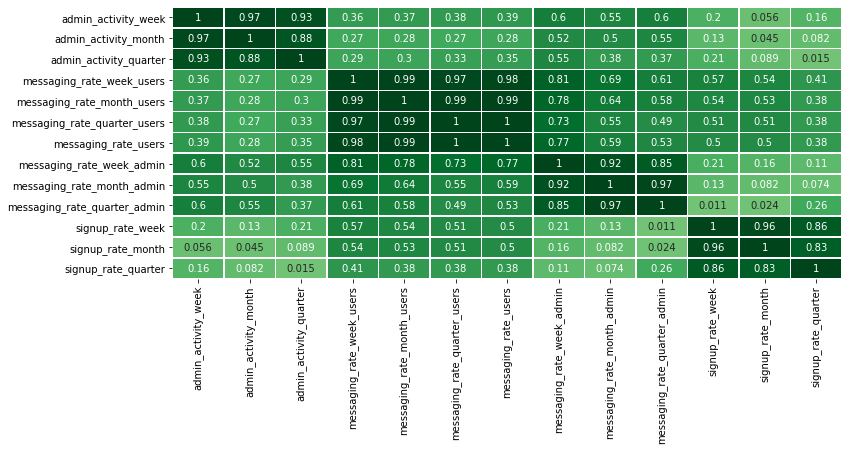

In [180]:
plt.figure(figsize=(12,5))

sns.heatmap(np.abs(df[df['name'].isin(most_active_hub['name'])][a].corr()),annot=True,
            center=0,linewidth=0.5,
            cbar=False,
            cmap="Greens")
plt.show()

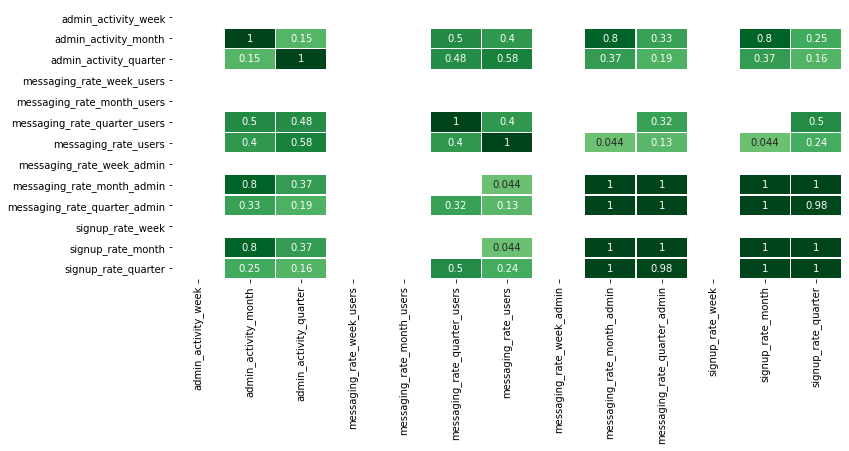

In [144]:
plt.figure(figsize=(12,5))

sns.heatmap(np.abs(df[df['name'].isin(least_active_hubs['name'])][a].corr()),annot=True,
            center=0,linewidth=0.5,
            cbar=False,
            cmap="Greens")
plt.show()

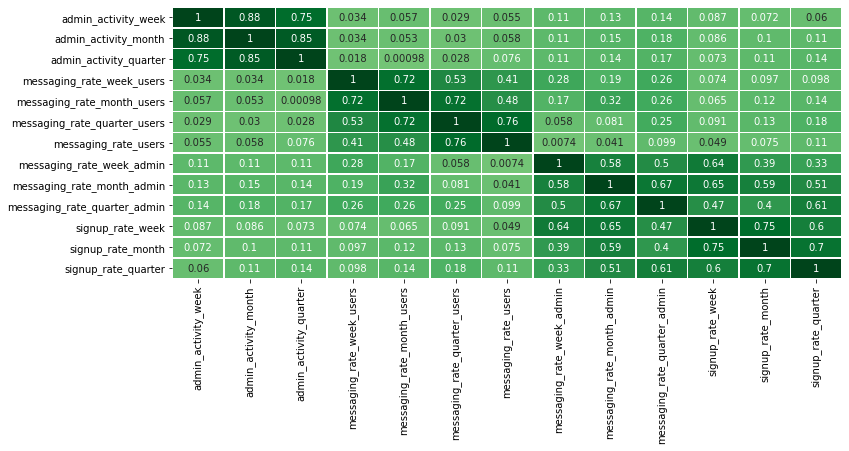

In [182]:
plt.figure(figsize=(12,5))

sns.heatmap(np.abs(df[a].corr()),annot=True,
            center=0,linewidth=0.5,
            cbar=False,
            cmap="Greens")
plt.show()

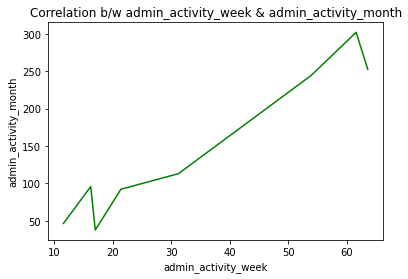

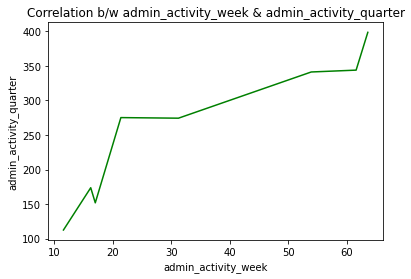

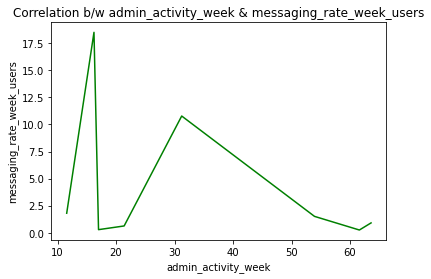

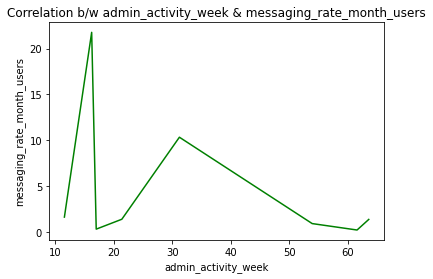

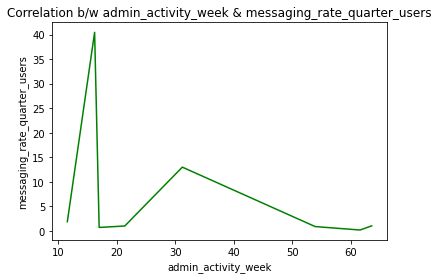

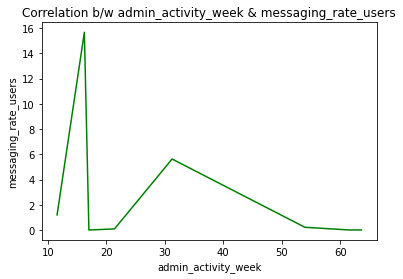

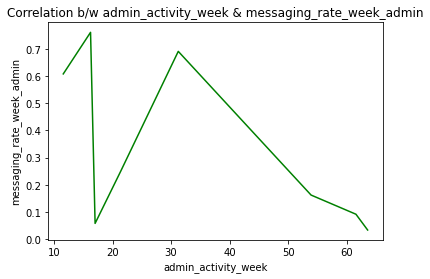

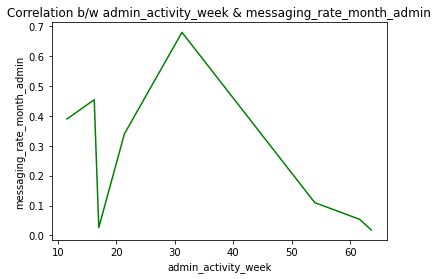

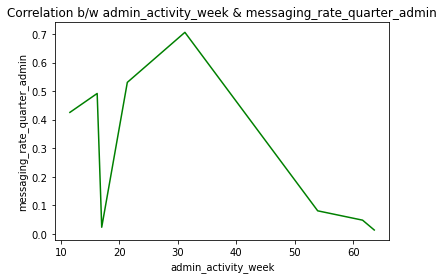

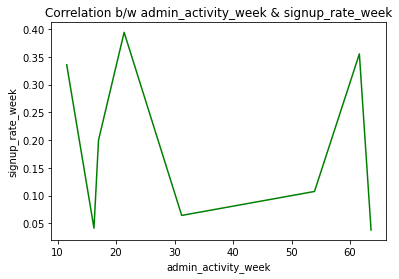

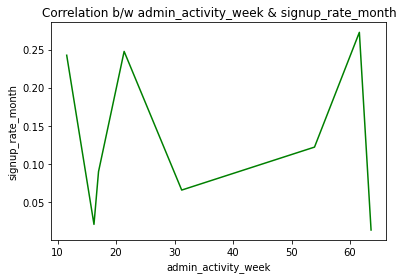

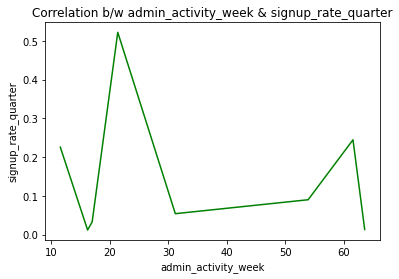

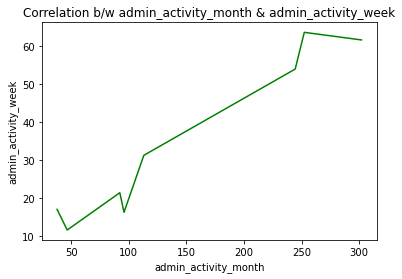

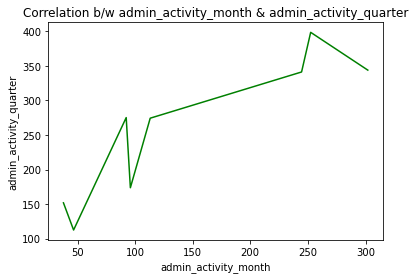

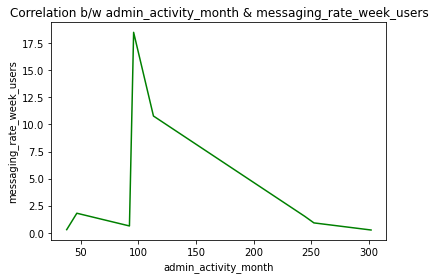

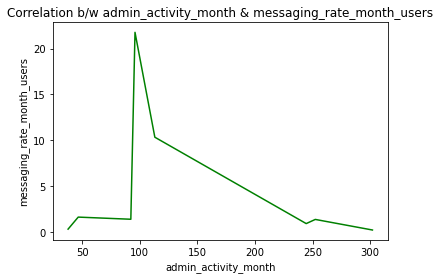

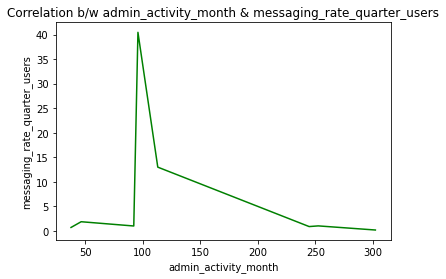

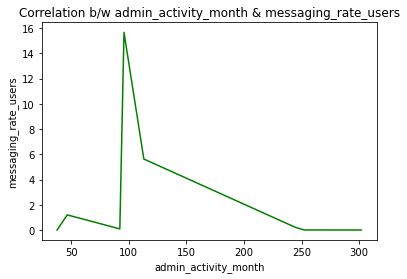

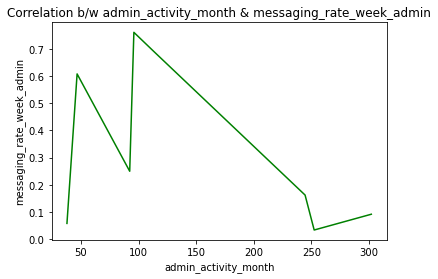

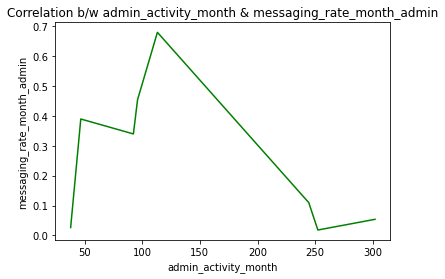

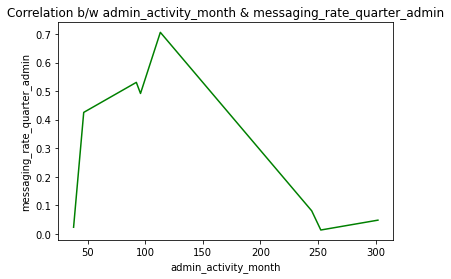

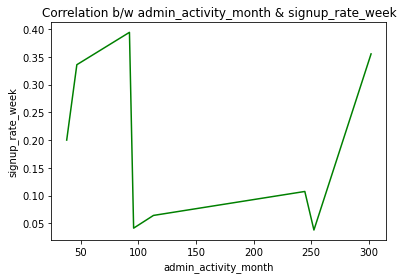

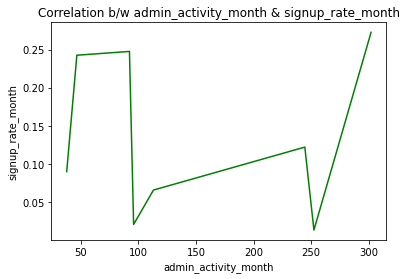

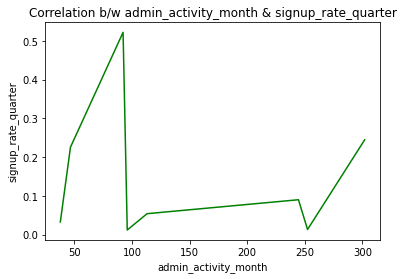

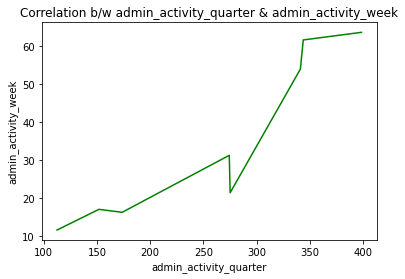

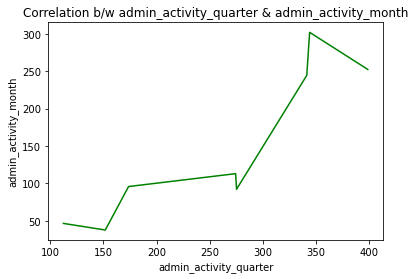

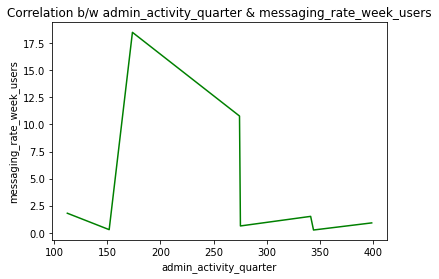

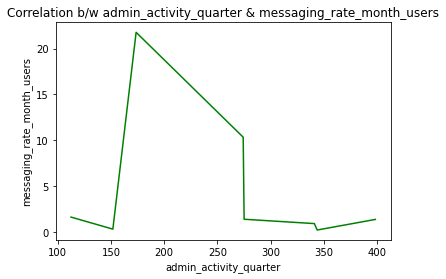

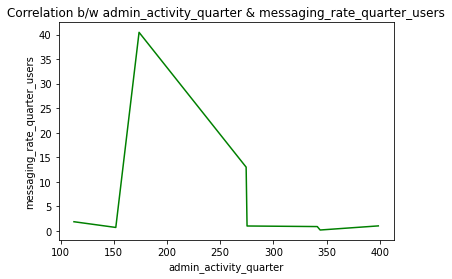

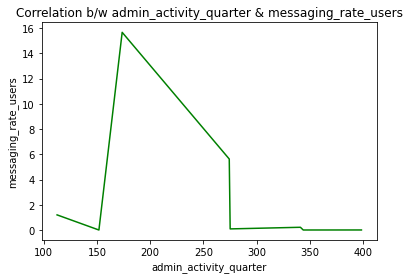

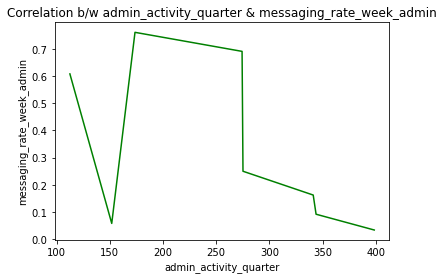

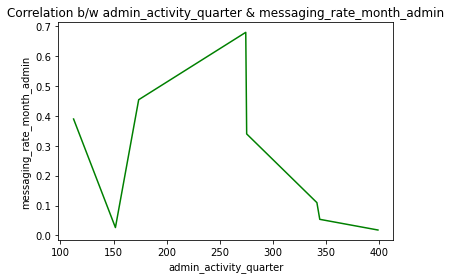

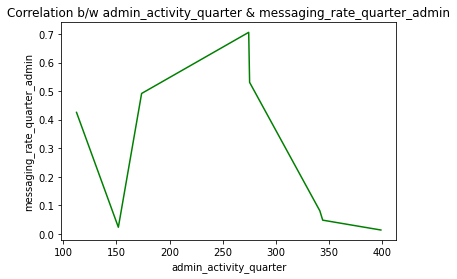

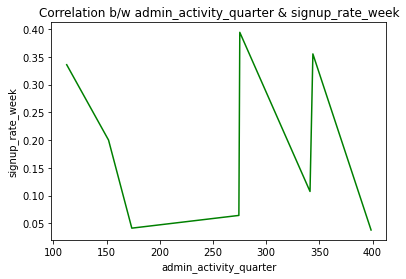

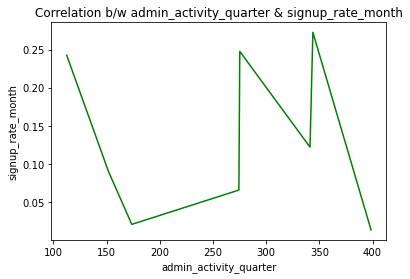

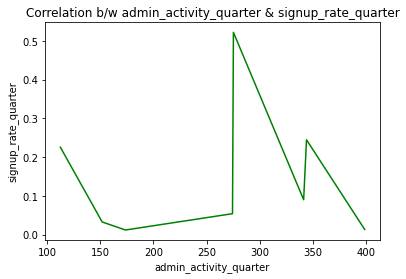

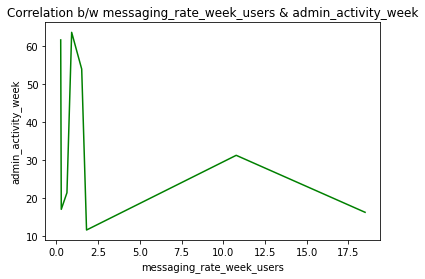

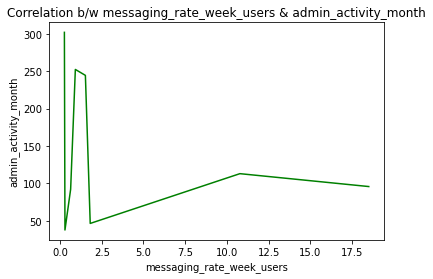

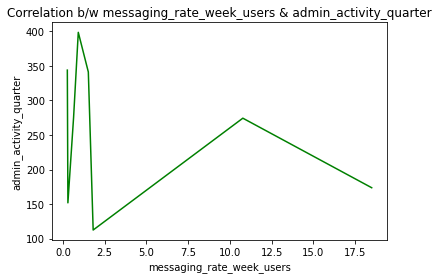

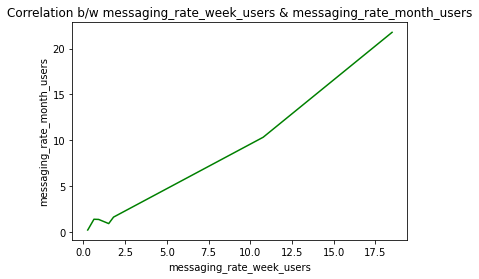

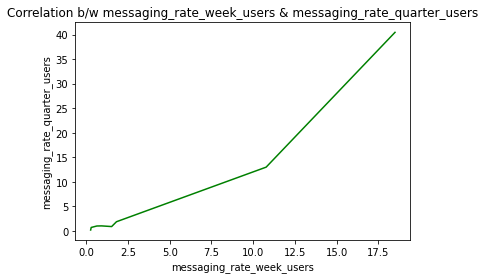

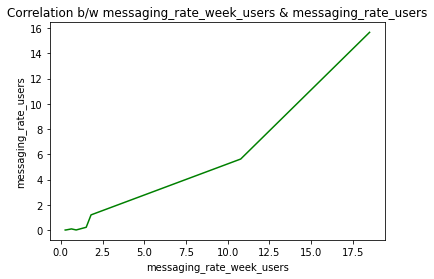

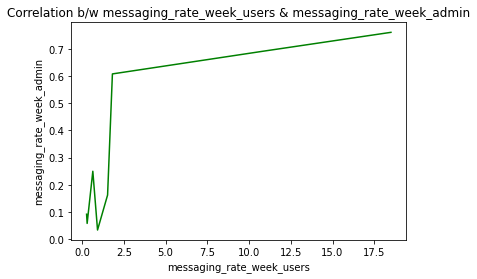

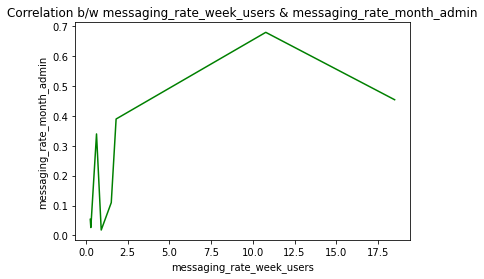

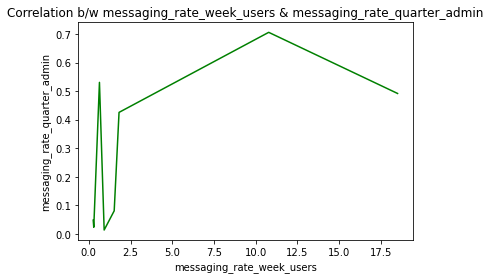

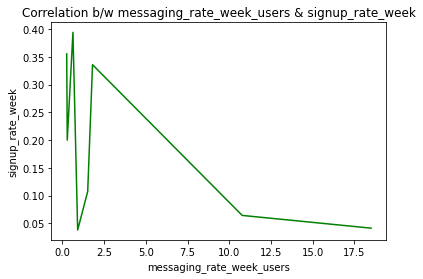

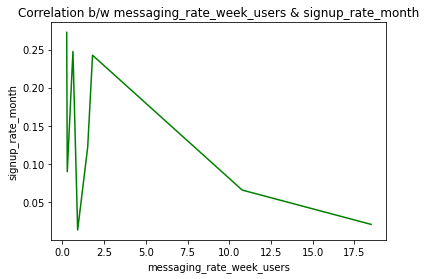

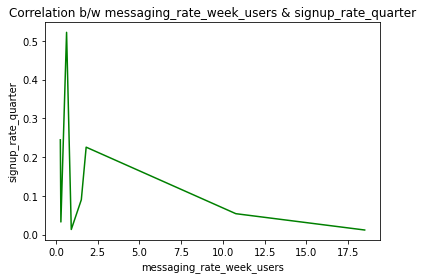

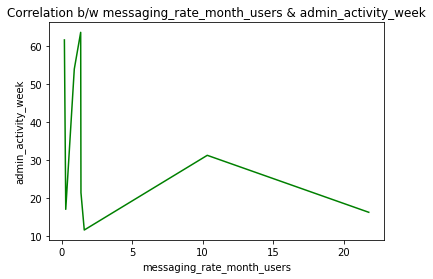

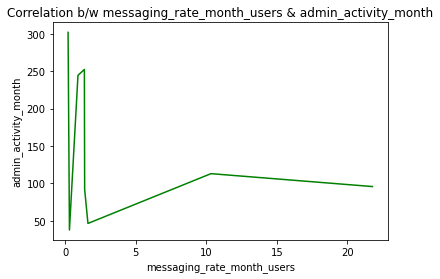

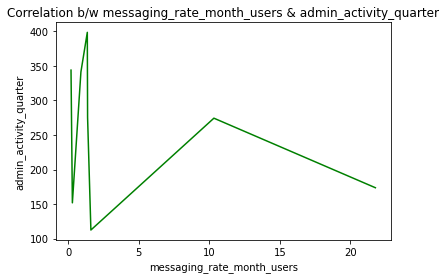

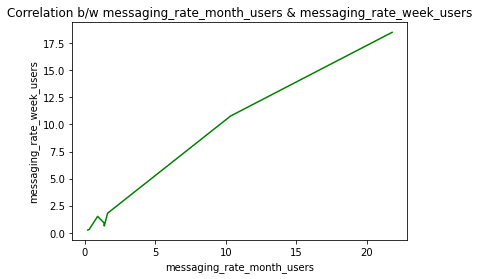

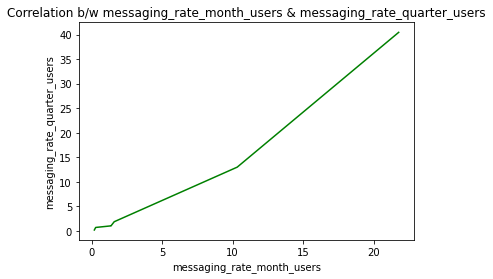

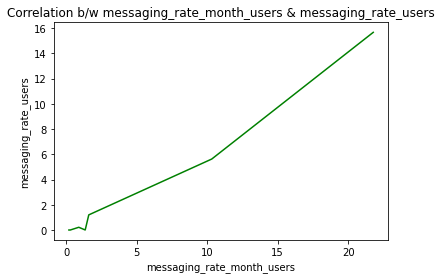

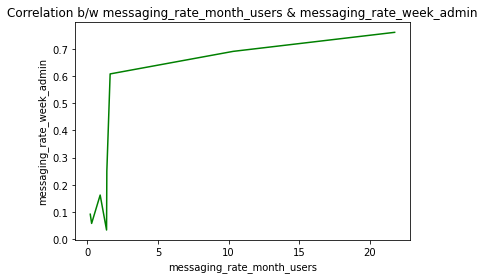

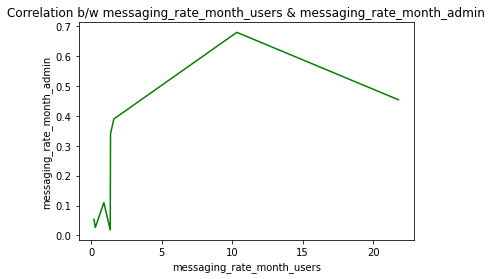

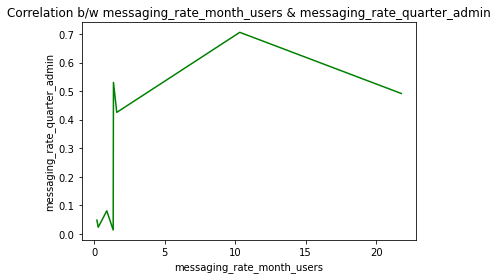

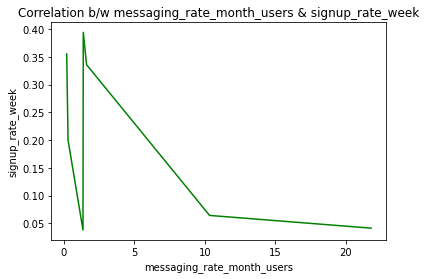

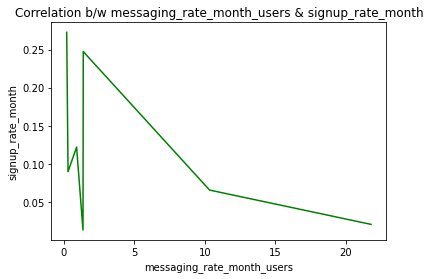

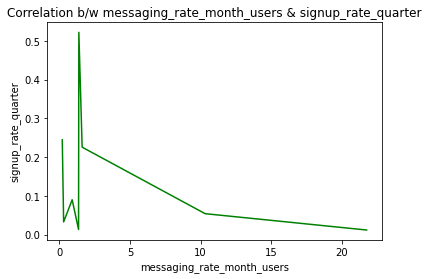

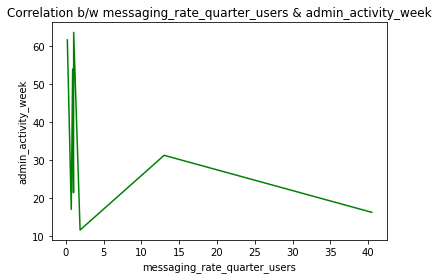

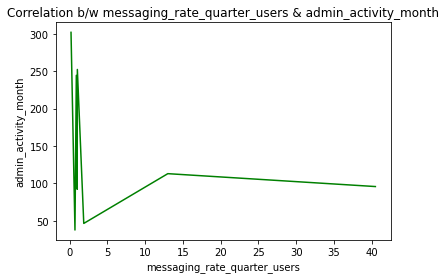

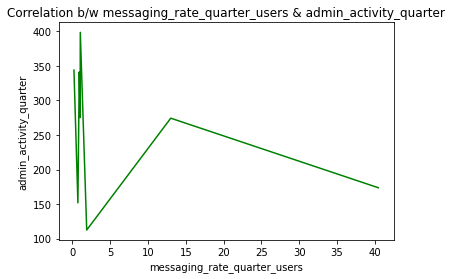

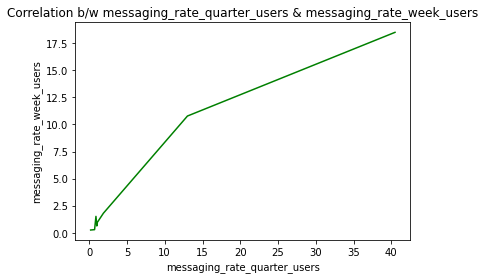

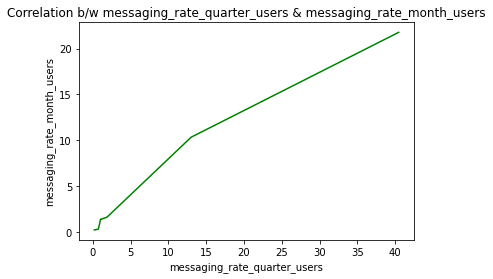

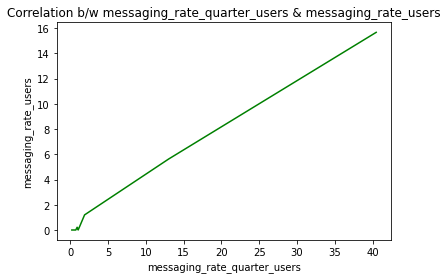

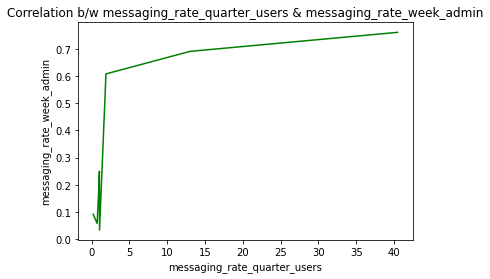

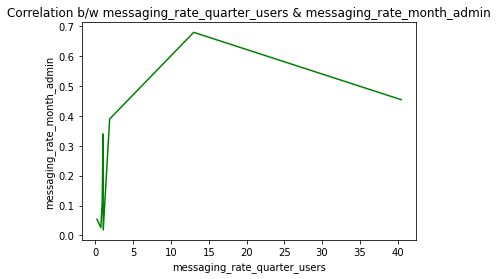

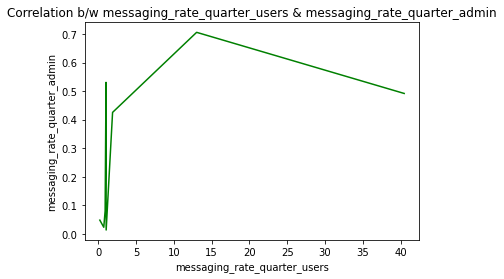

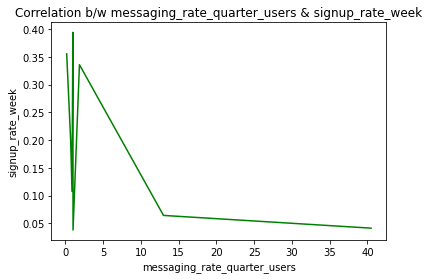

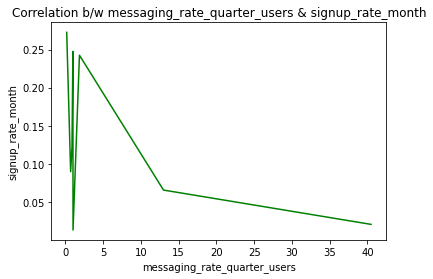

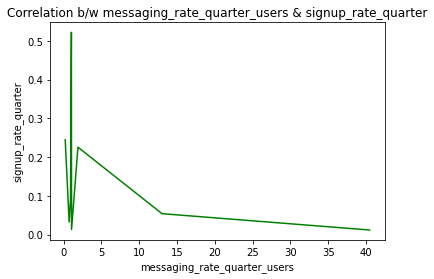

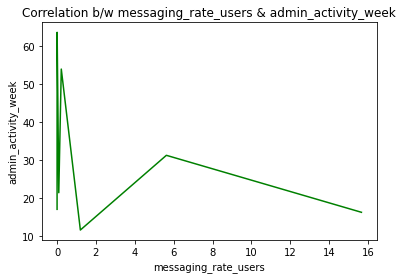

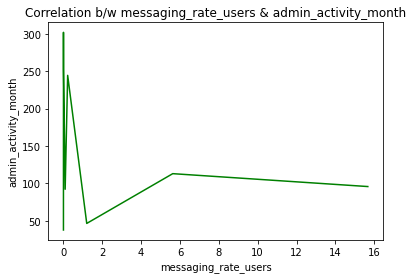

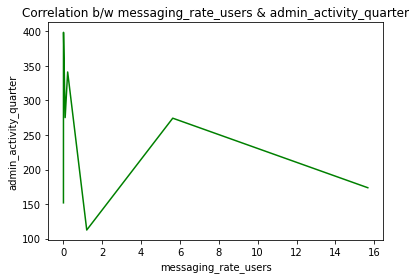

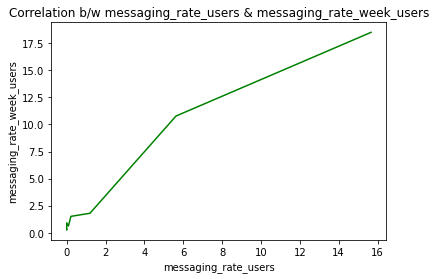

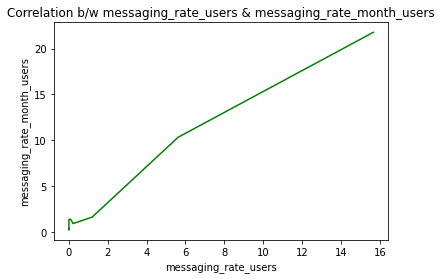

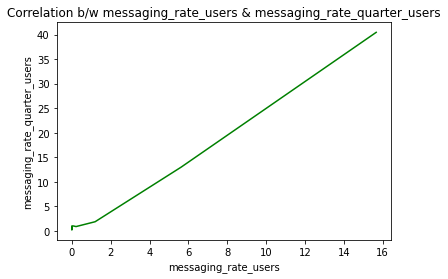

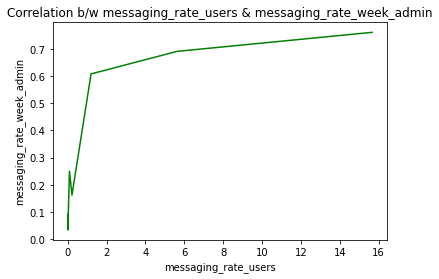

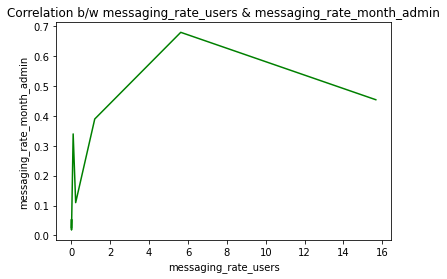

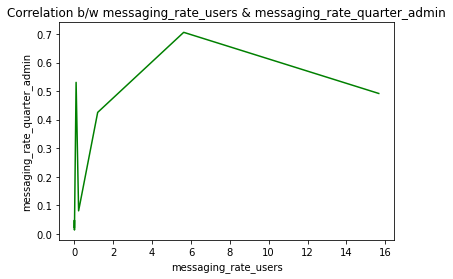

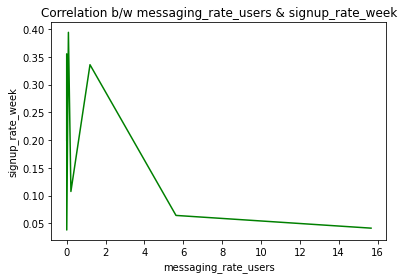

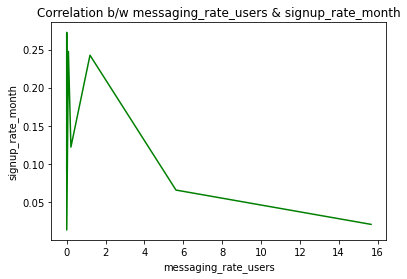

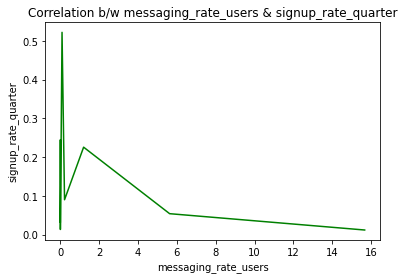

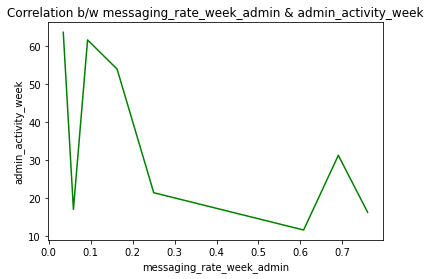

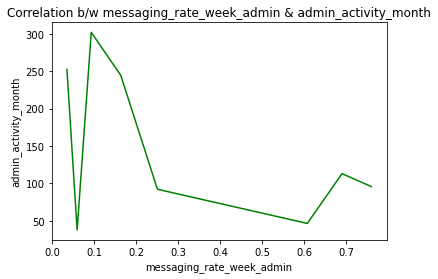

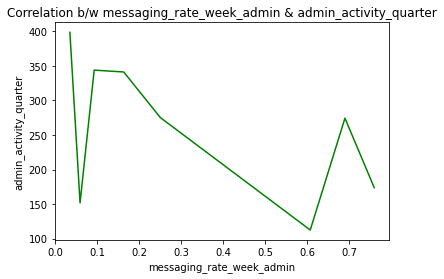

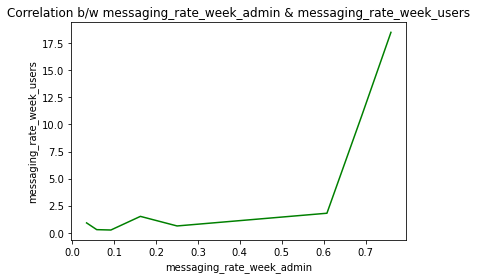

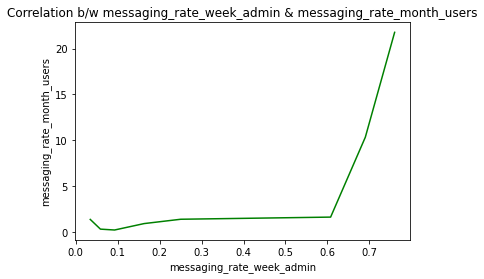

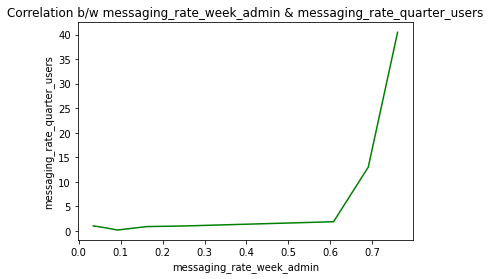

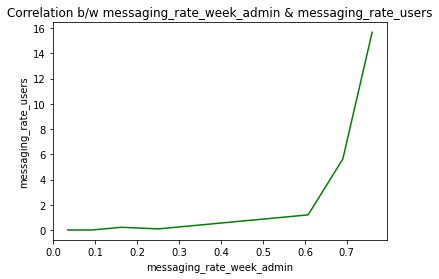

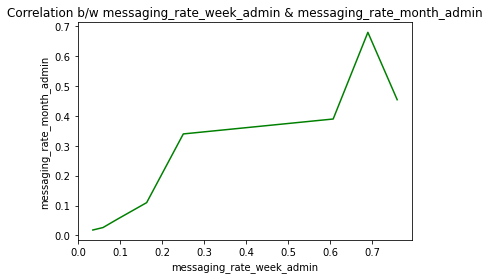

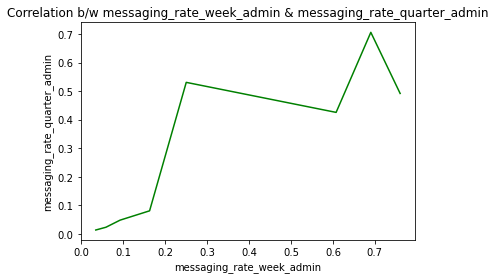

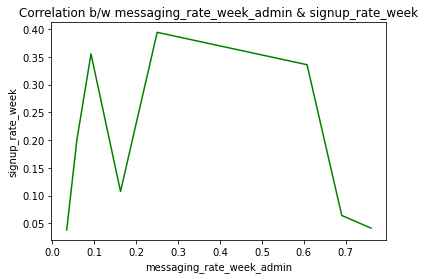

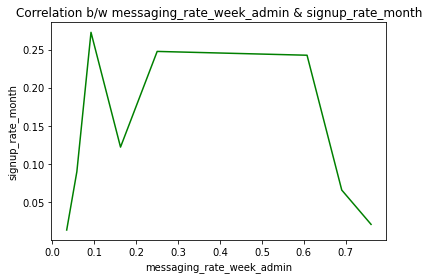

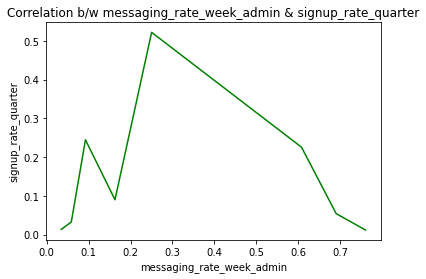

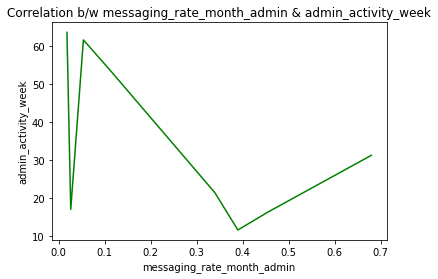

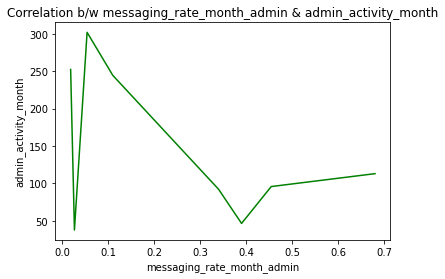

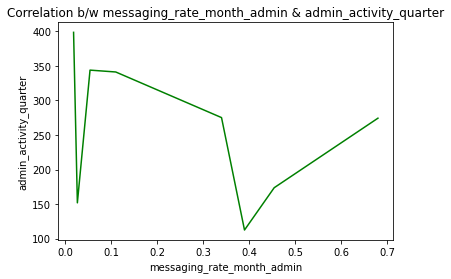

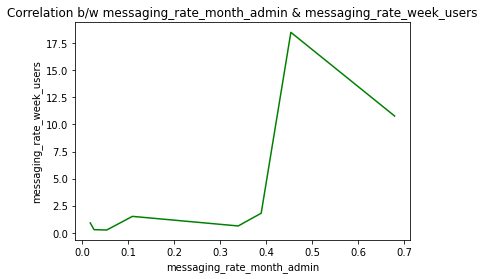

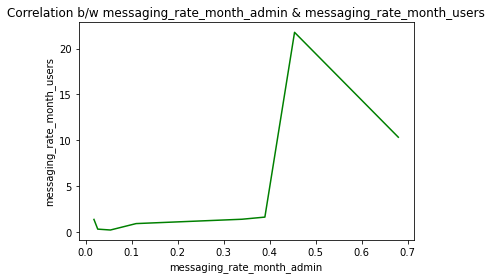

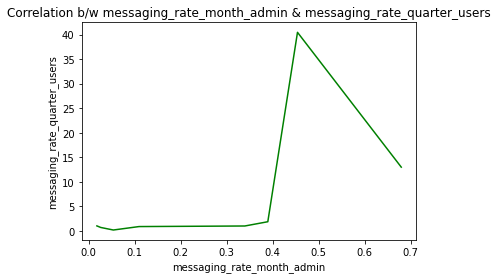

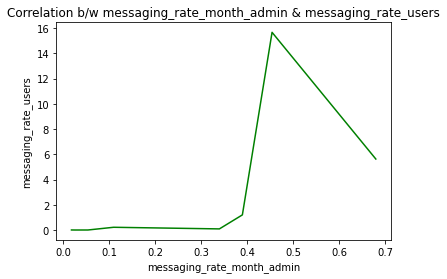

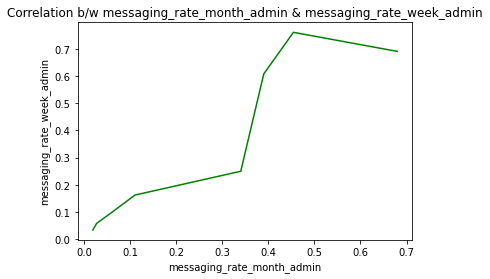

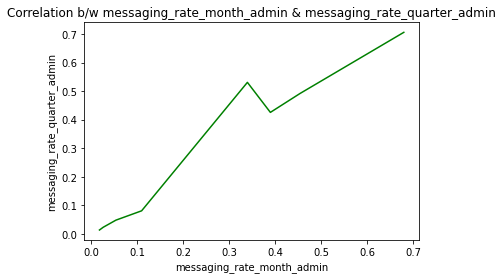

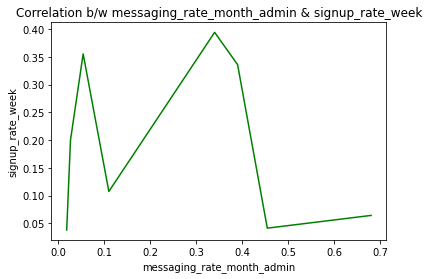

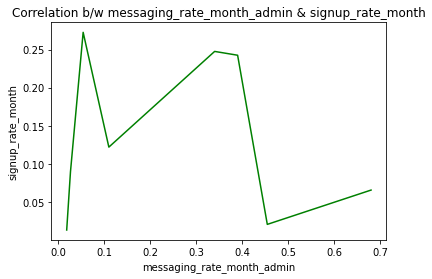

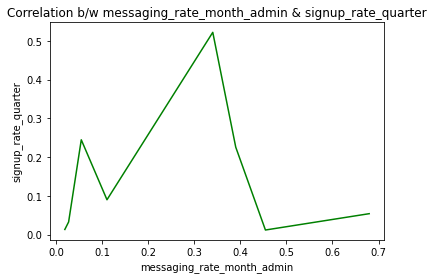

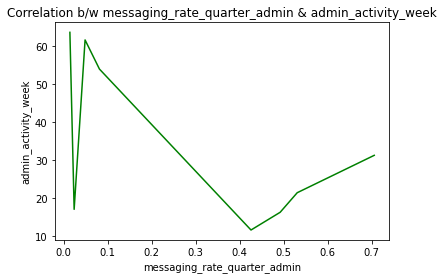

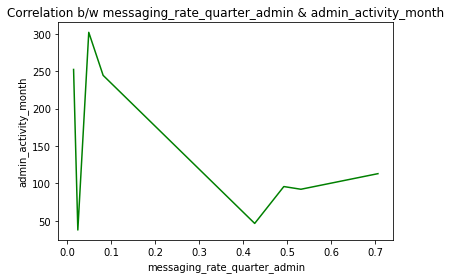

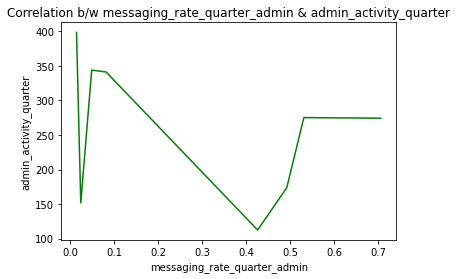

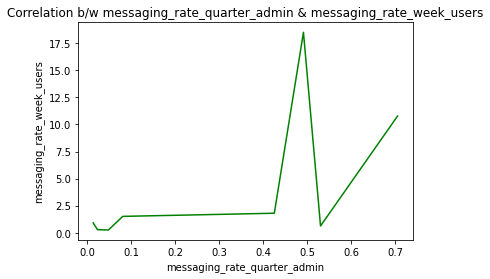

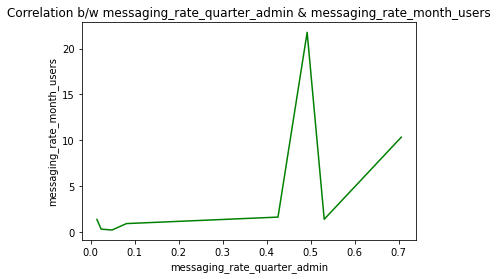

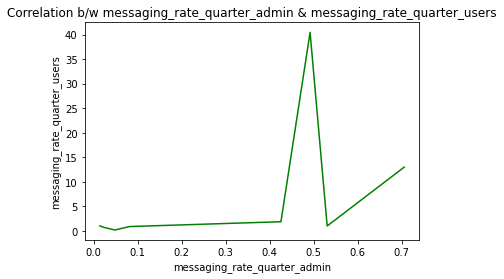

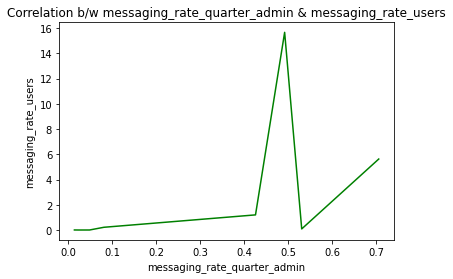

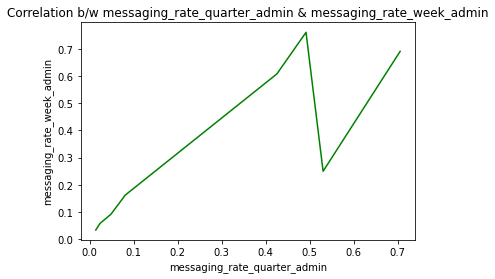

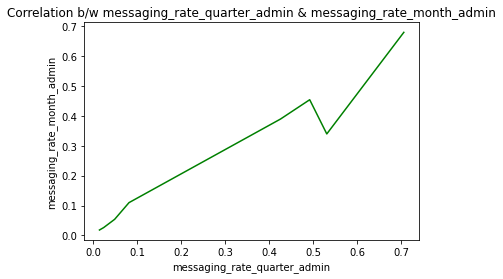

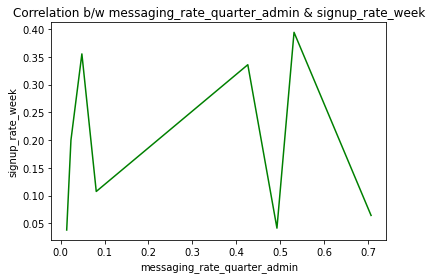

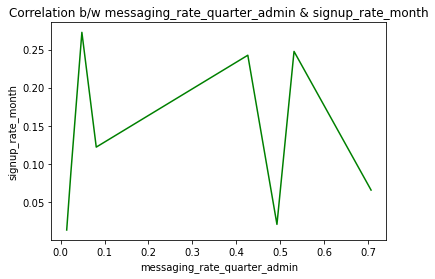

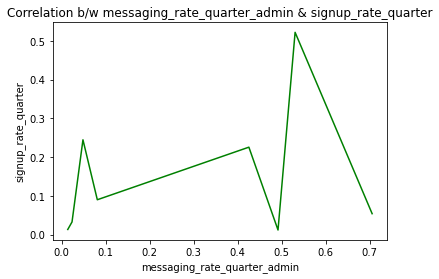

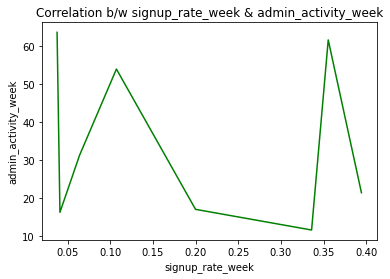

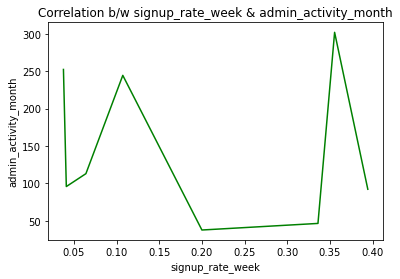

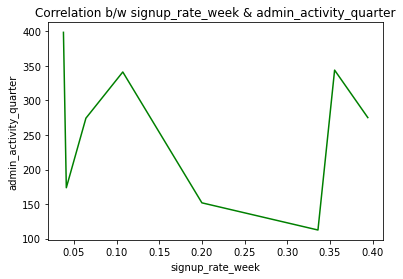

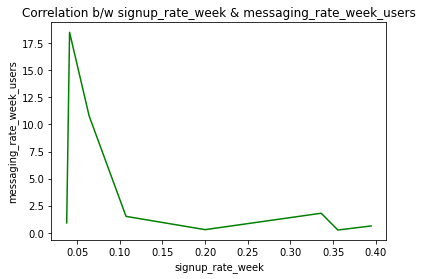

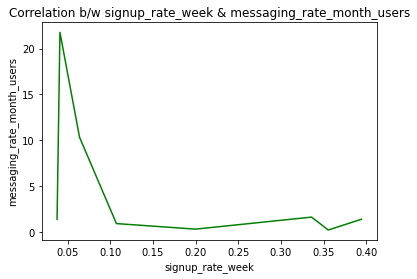

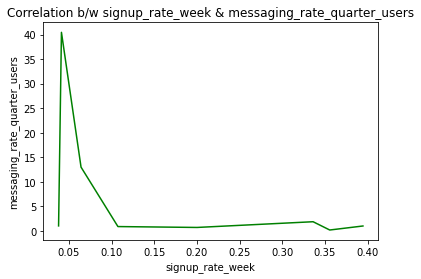

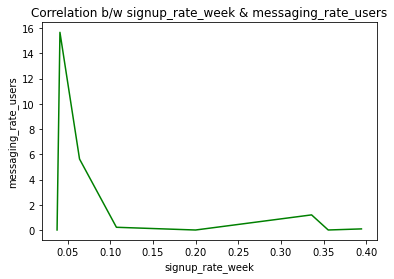

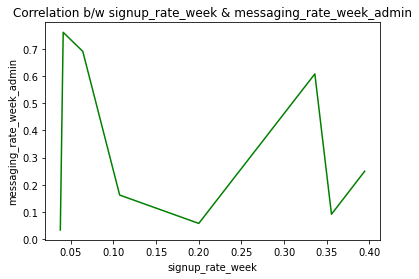

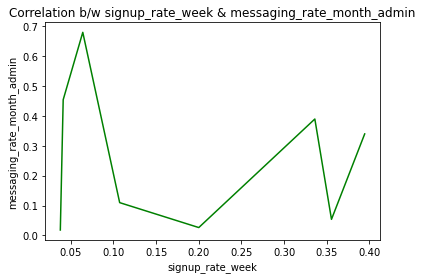

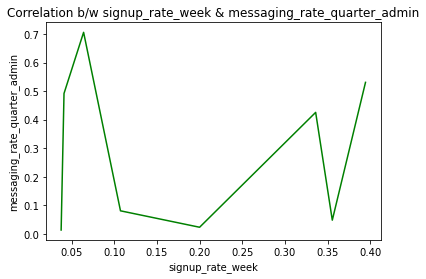

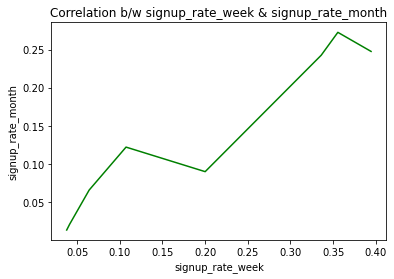

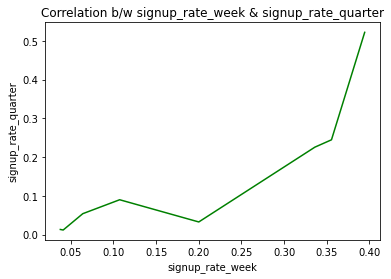

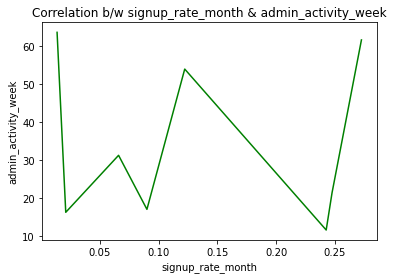

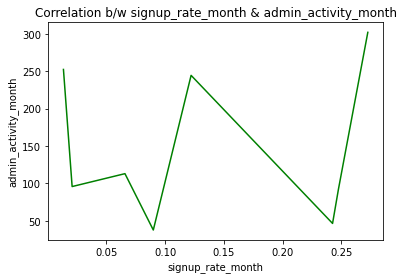

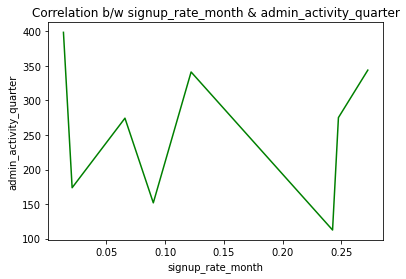

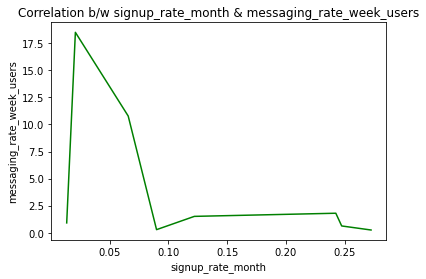

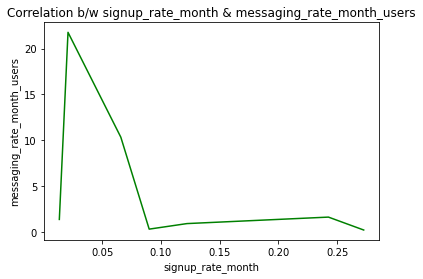

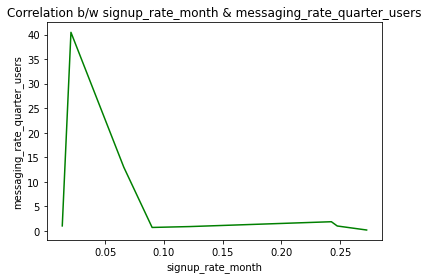

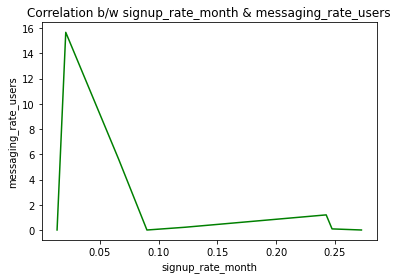

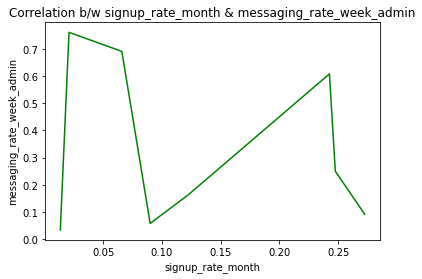

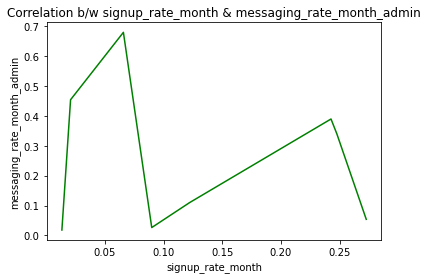

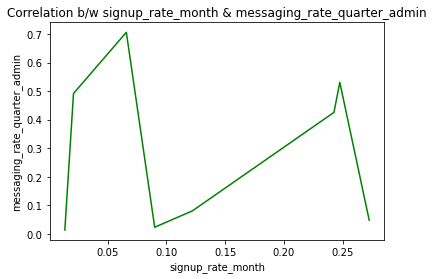

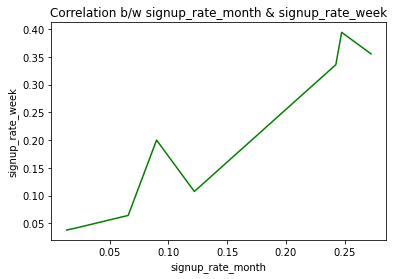

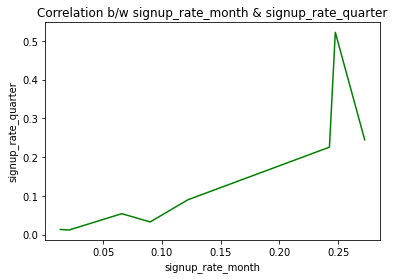

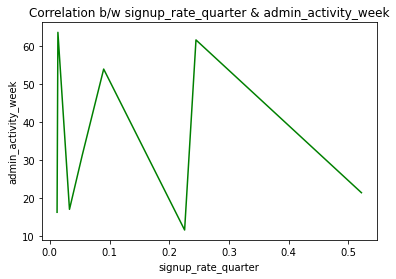

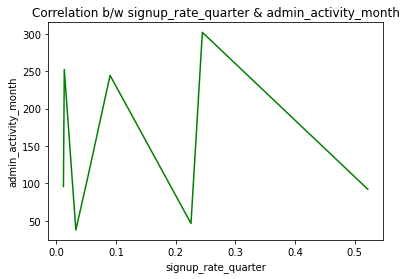

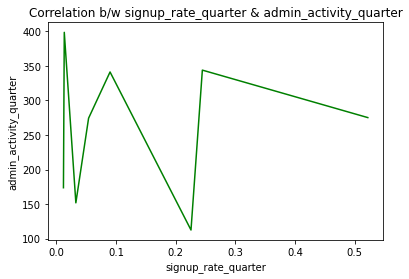

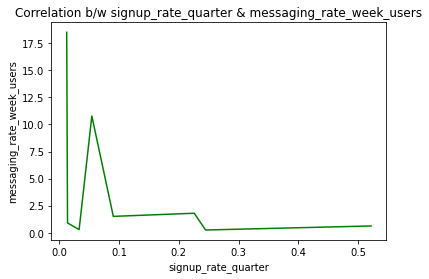

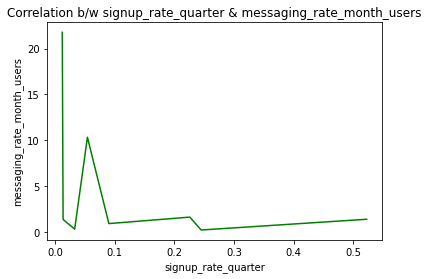

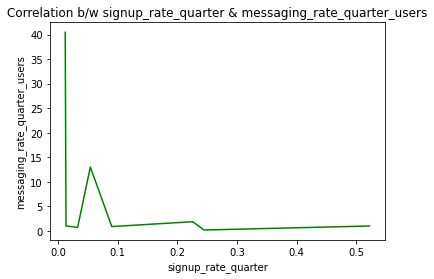

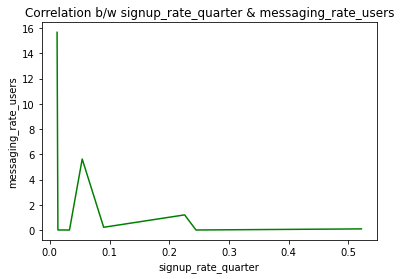

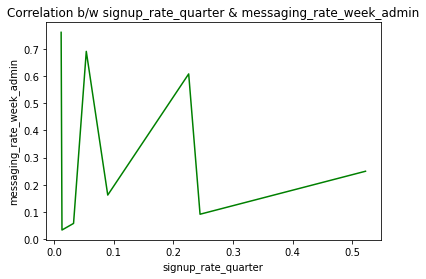

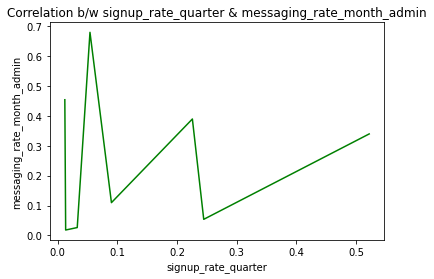

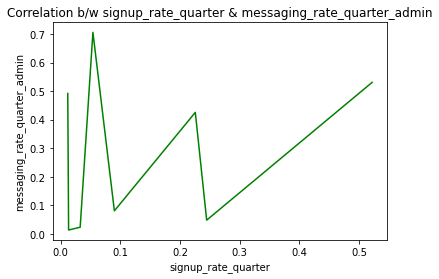

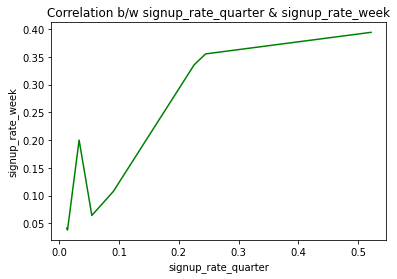

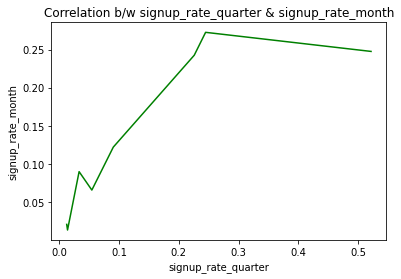

In [185]:
for i in a:
    for j in a:
        if i!=j:
            plt.title(f'Correlation b/w {i} & {j}')
            sns.lineplot(df[df['name'].isin(most_active_hub['name'])][a][i],df[df['name'].isin(most_active_hub['name'])][a][j],color='green')
            plt.show()

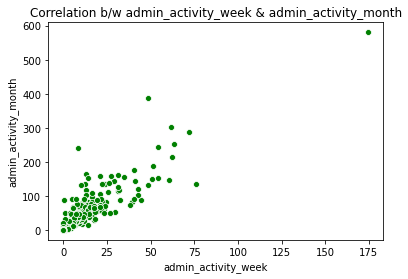

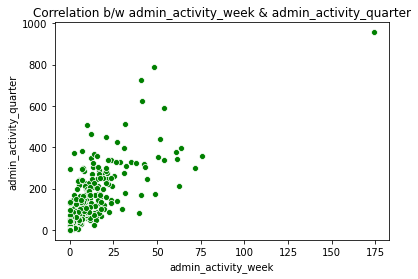

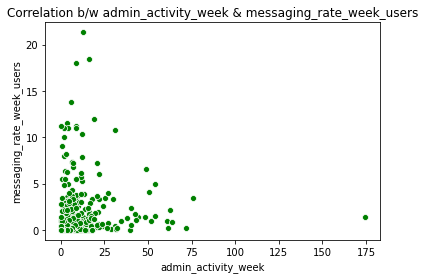

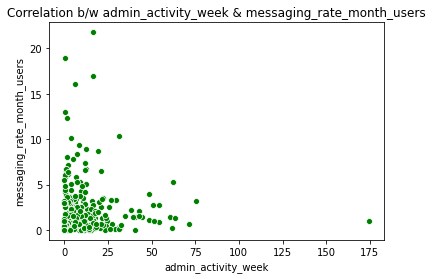

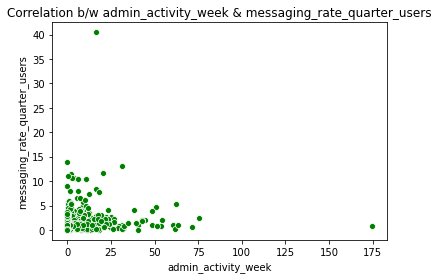

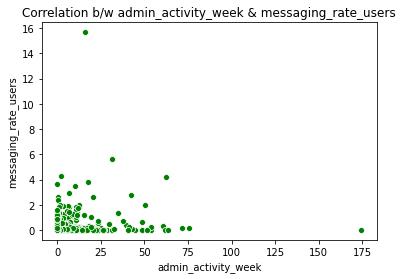

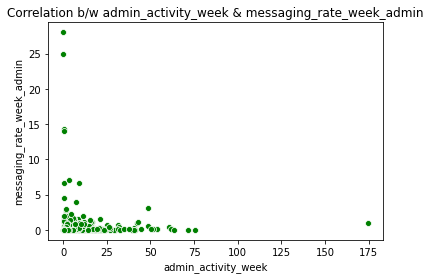

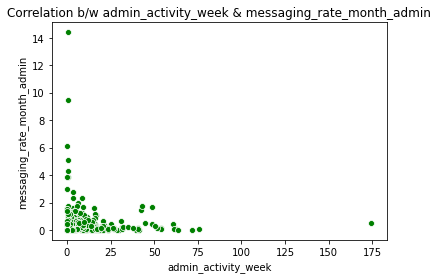

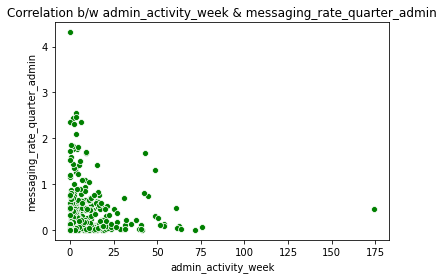

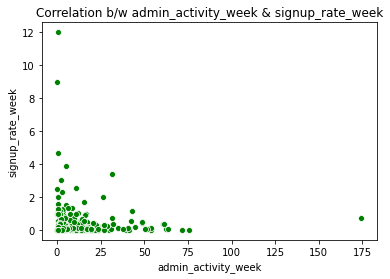

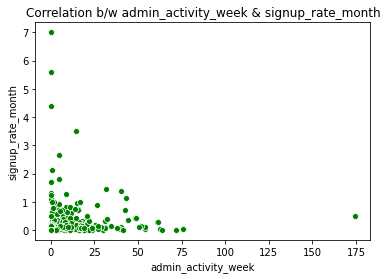

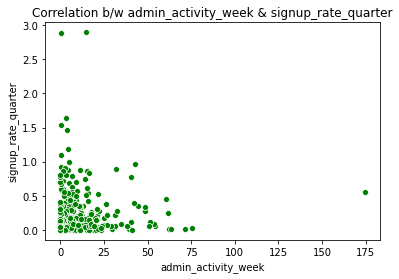

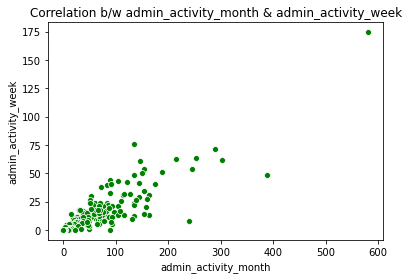

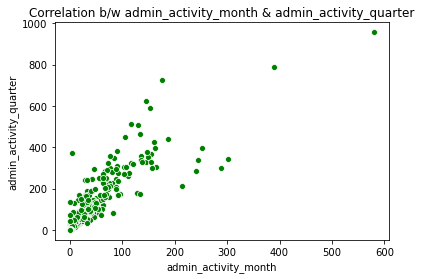

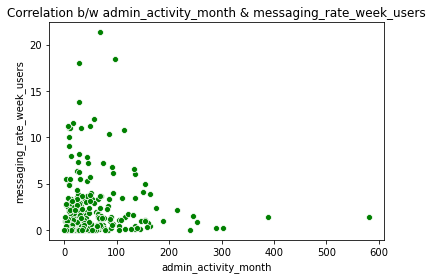

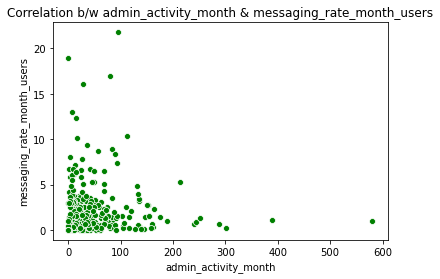

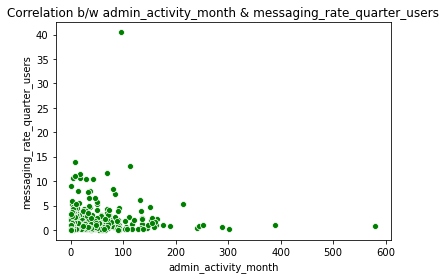

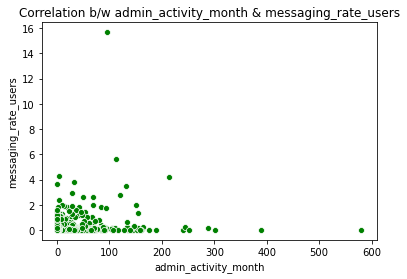

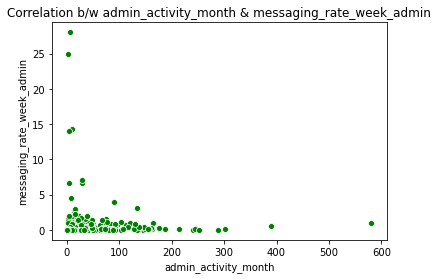

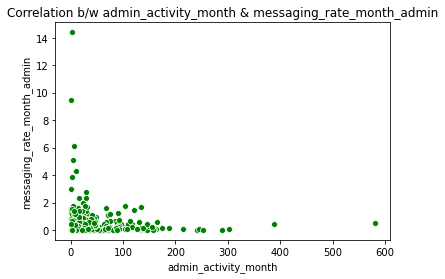

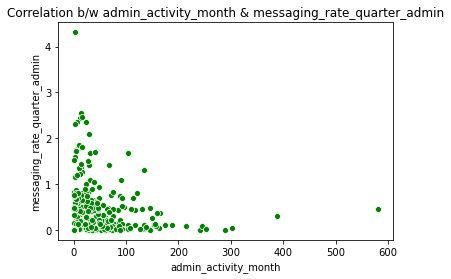

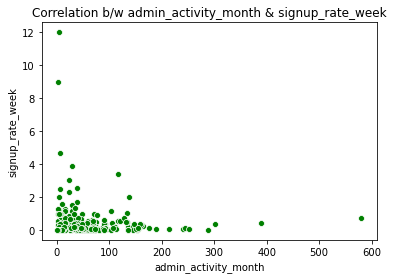

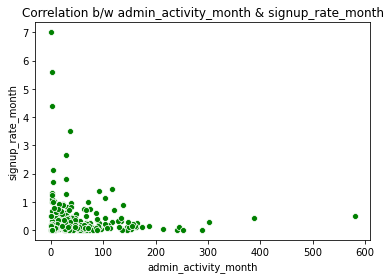

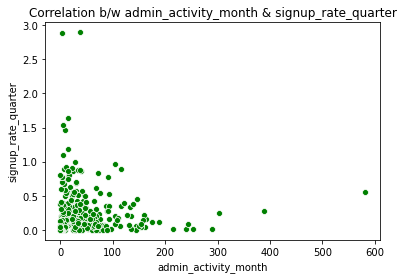

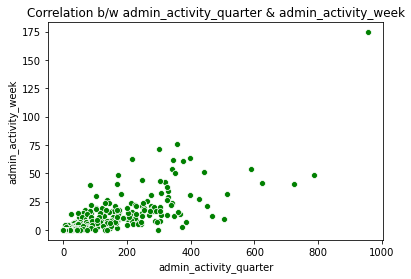

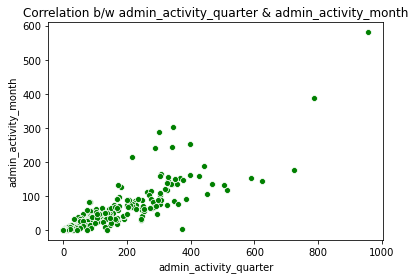

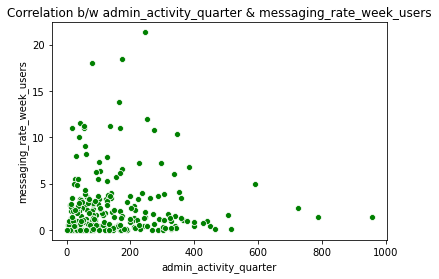

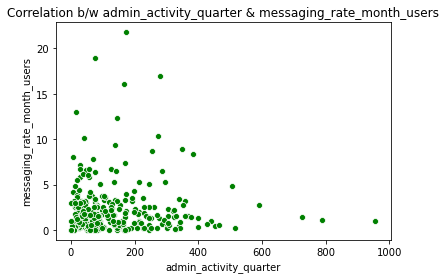

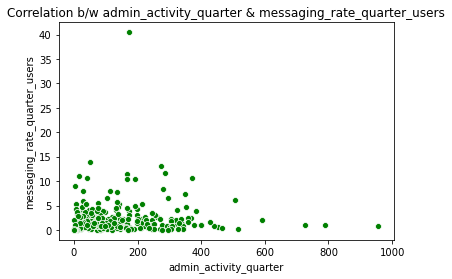

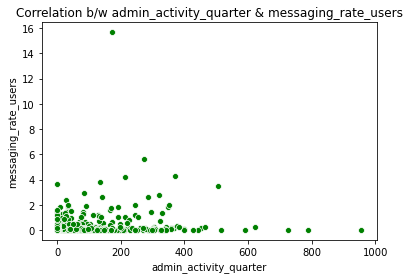

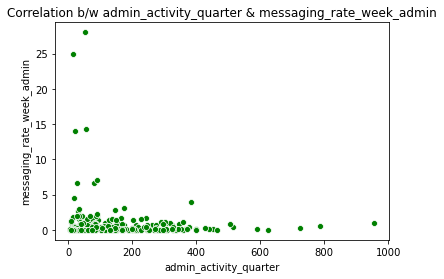

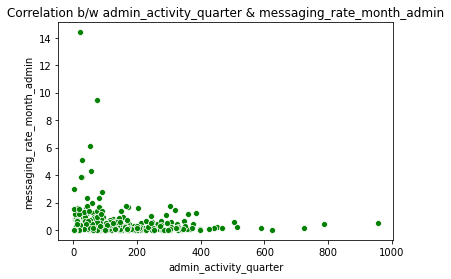

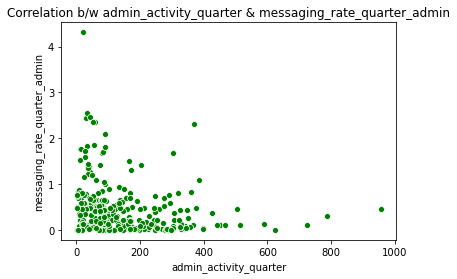

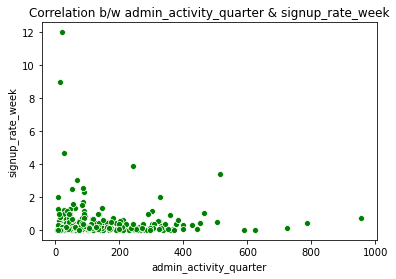

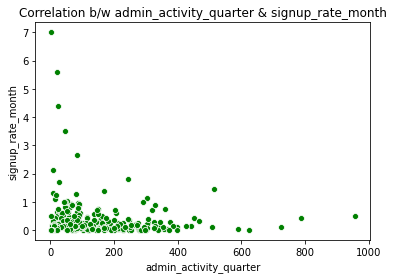

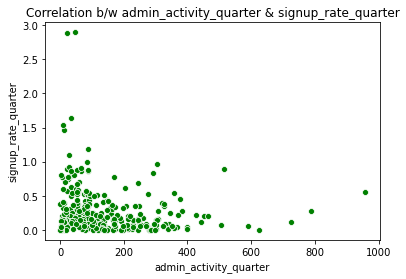

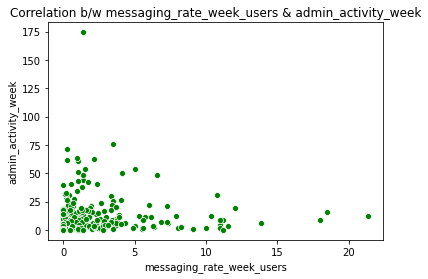

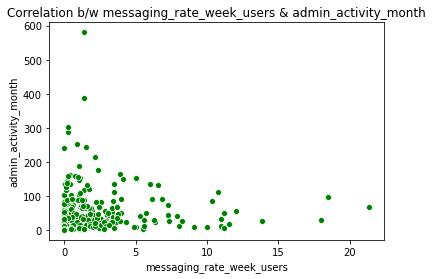

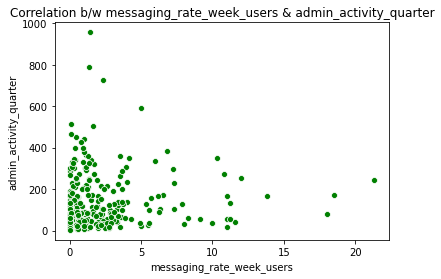

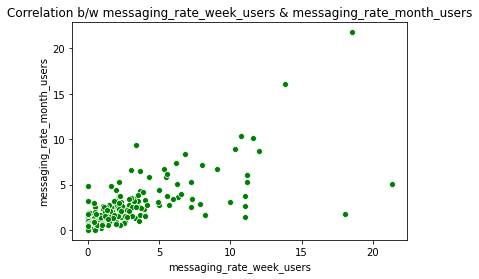

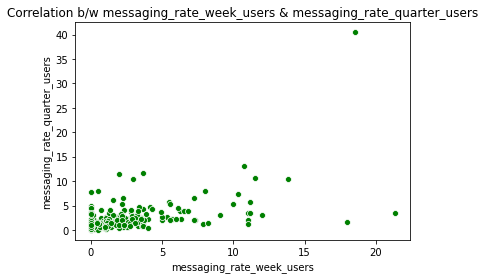

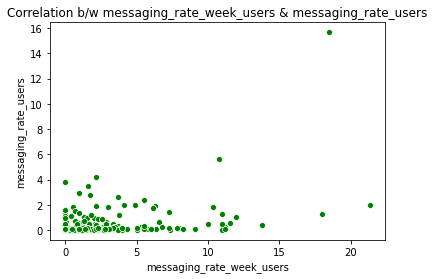

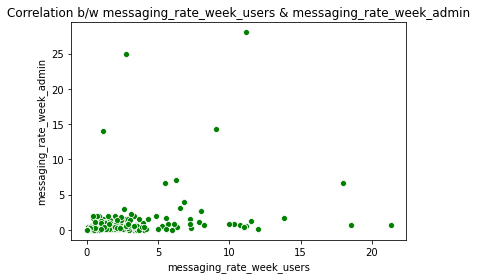

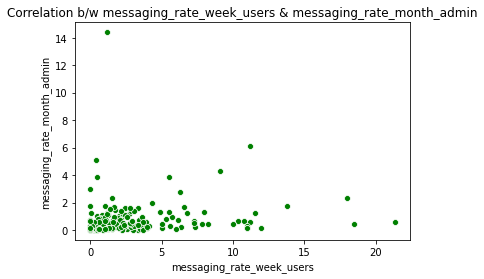

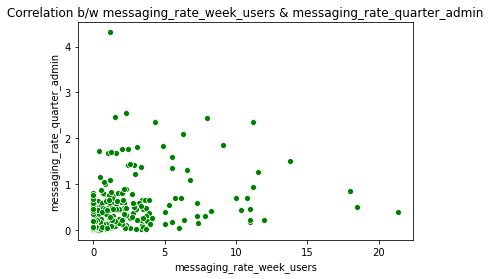

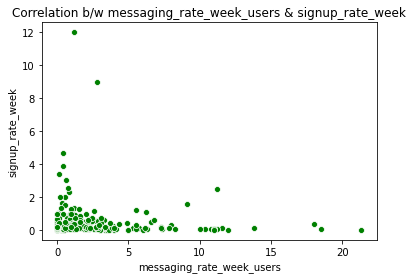

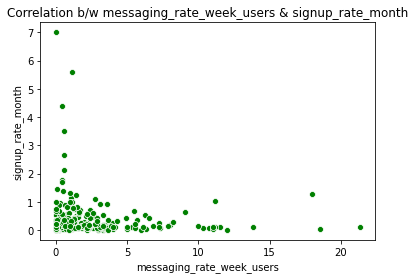

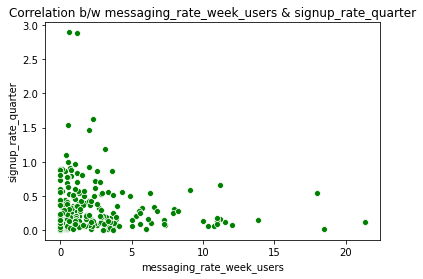

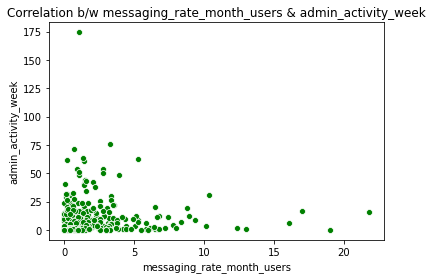

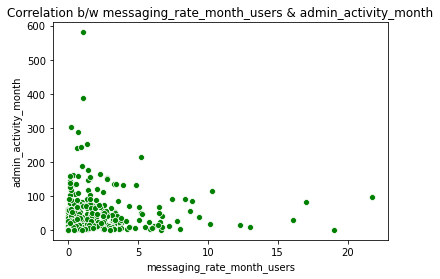

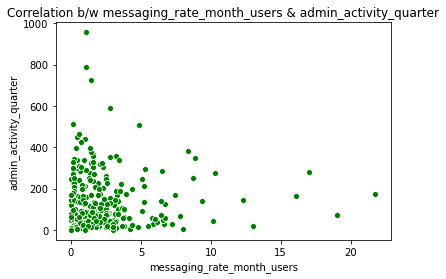

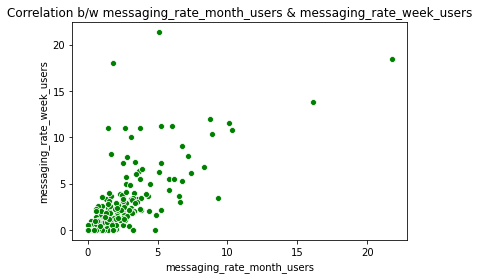

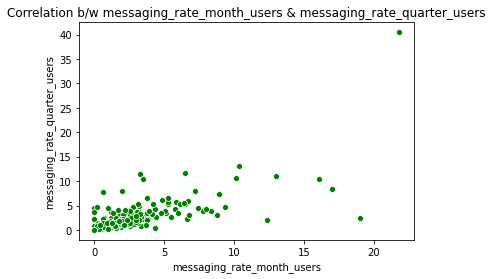

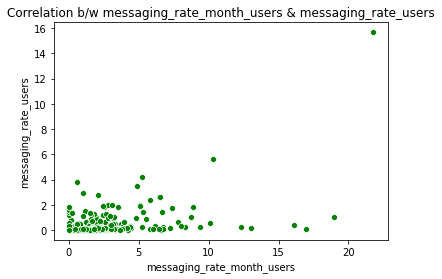

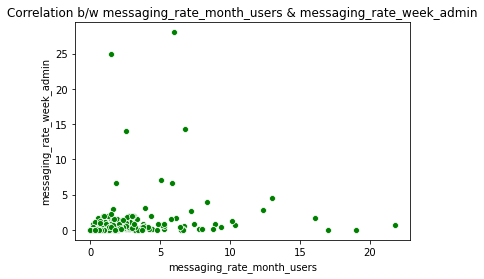

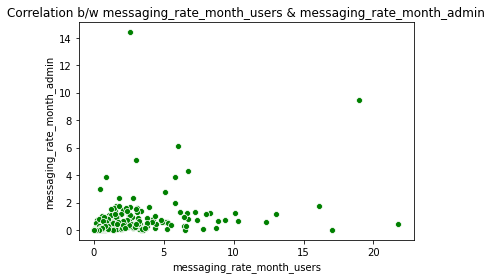

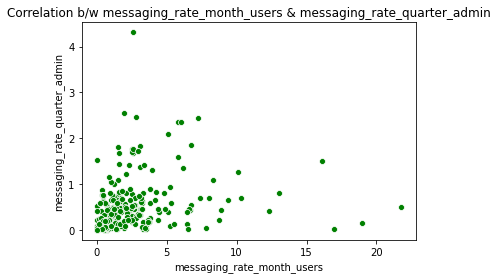

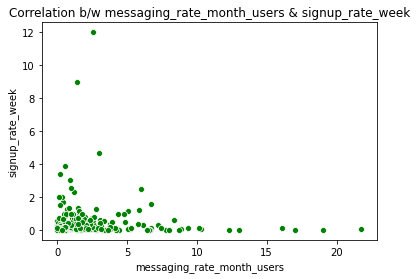

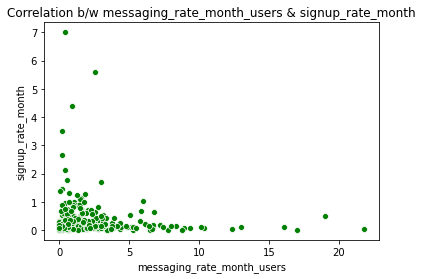

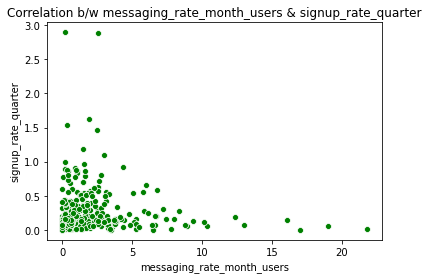

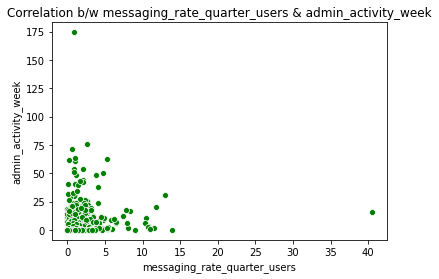

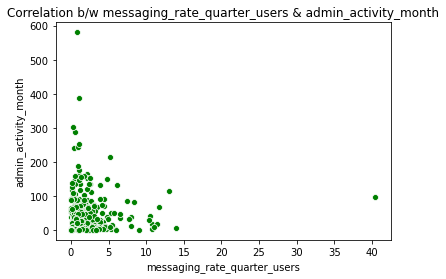

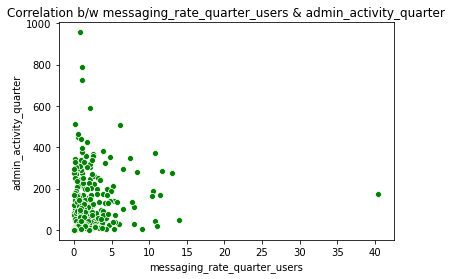

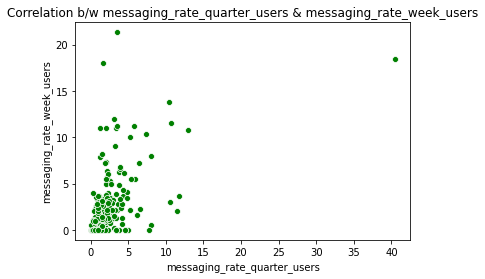

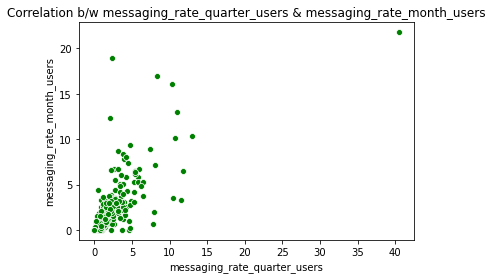

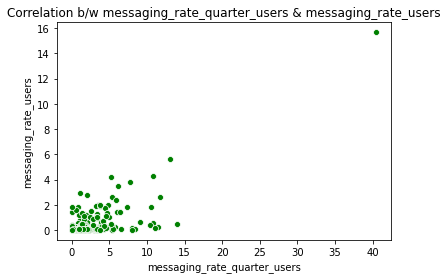

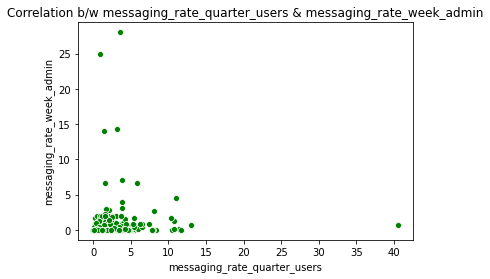

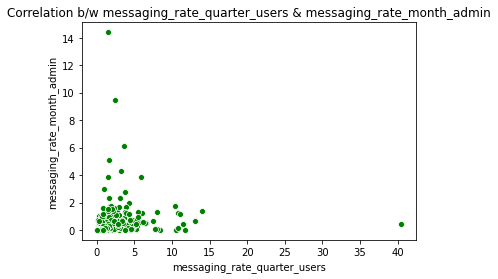

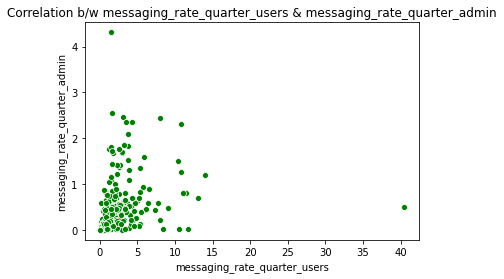

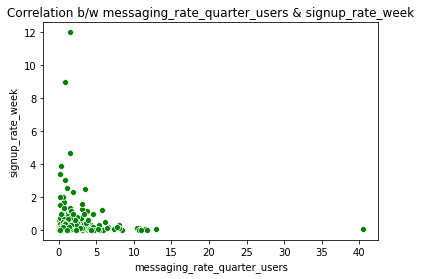

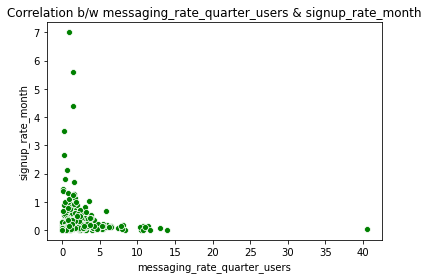

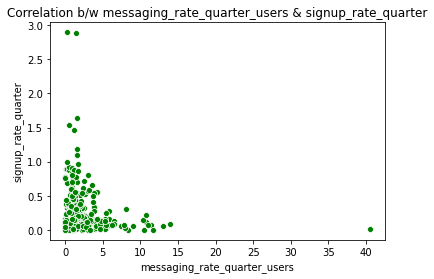

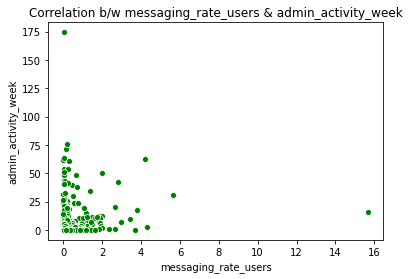

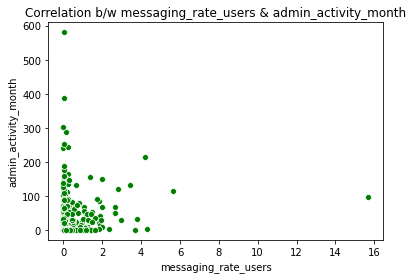

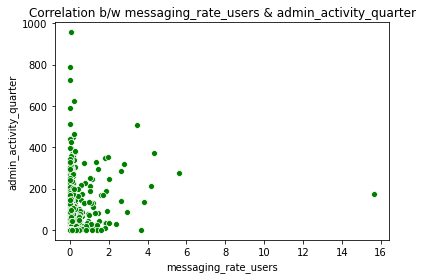

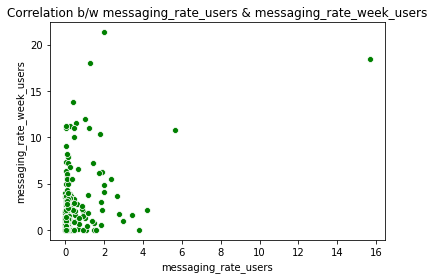

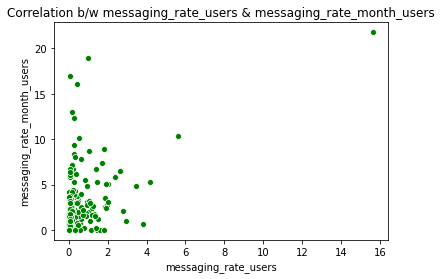

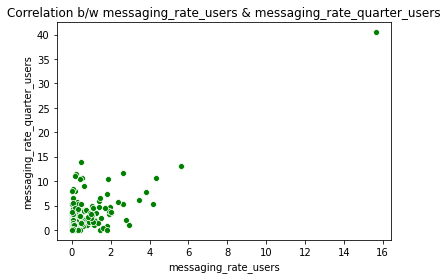

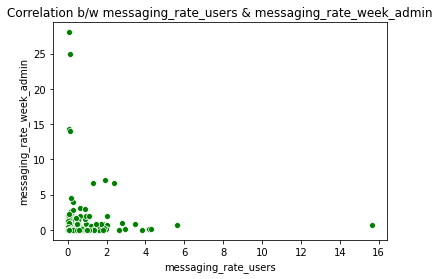

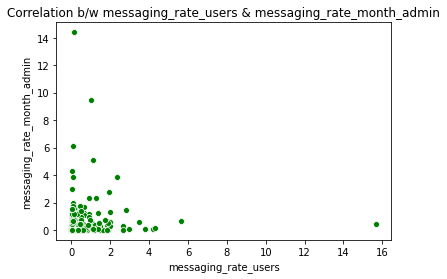

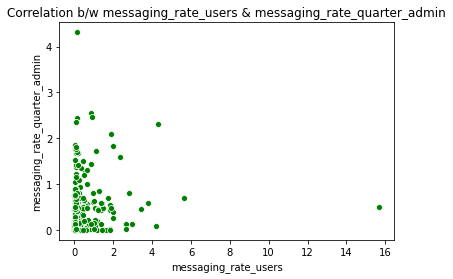

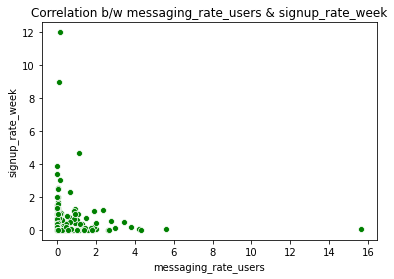

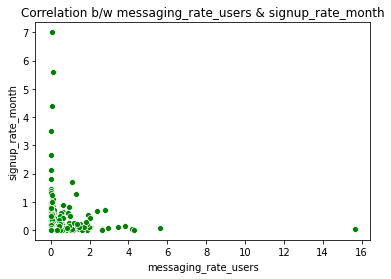

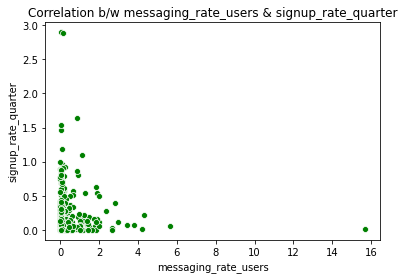

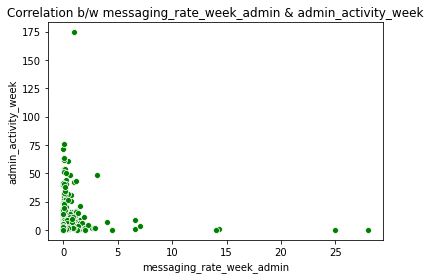

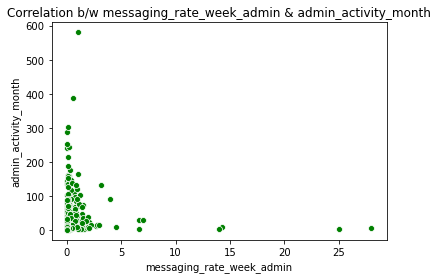

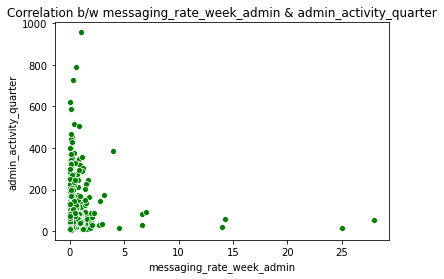

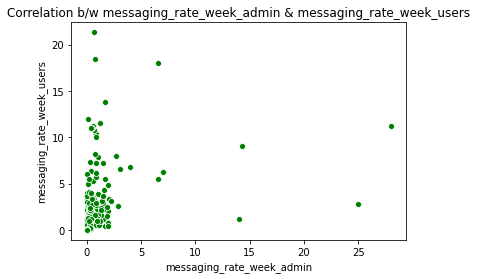

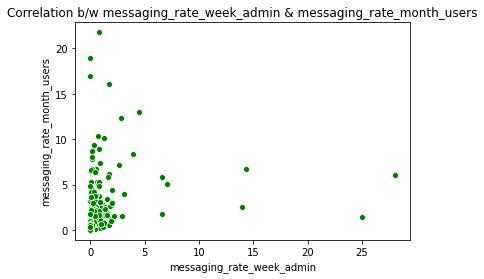

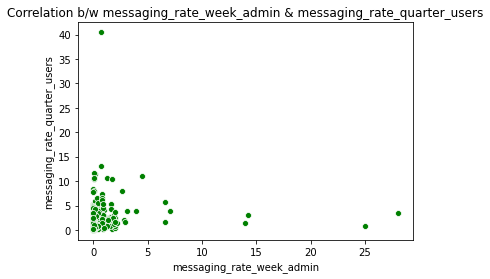

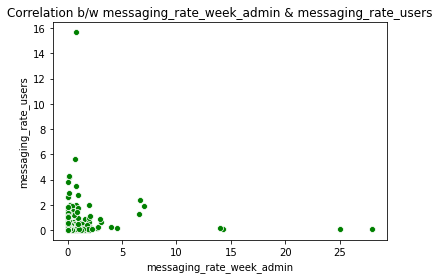

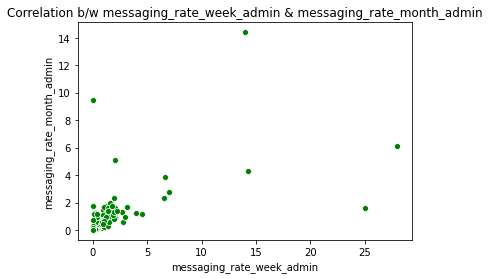

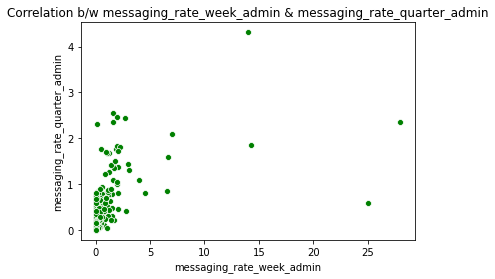

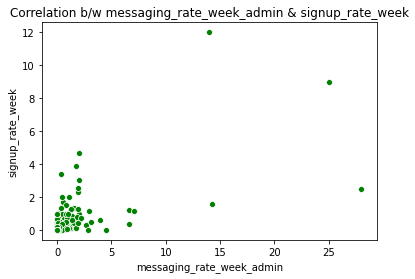

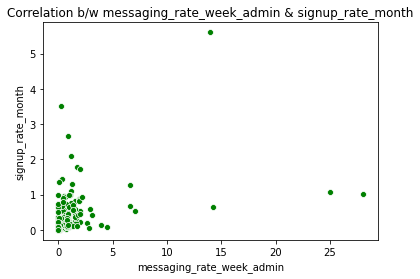

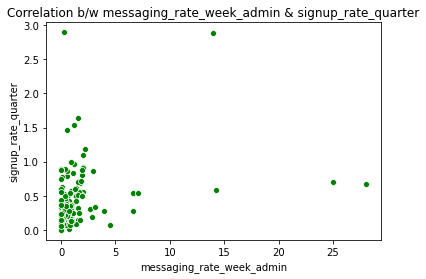

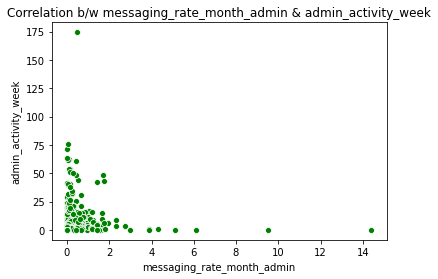

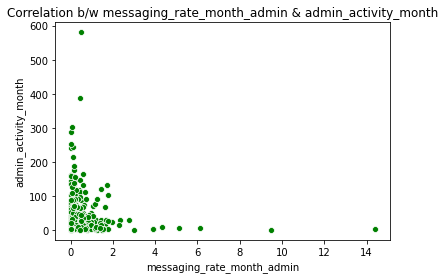

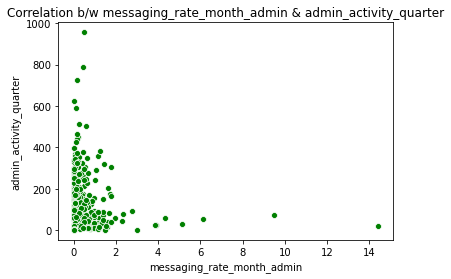

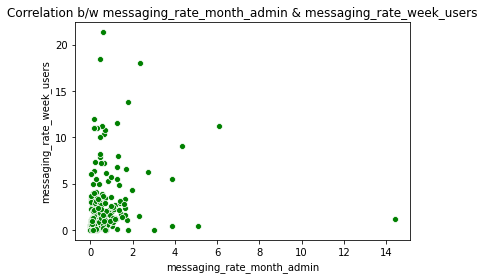

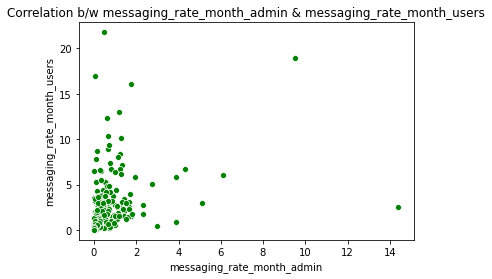

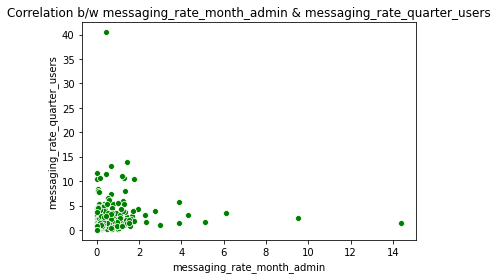

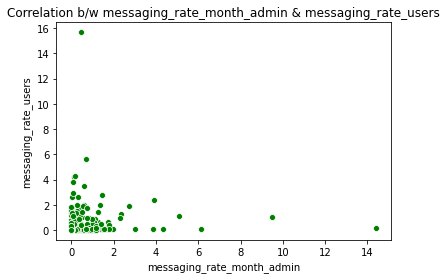

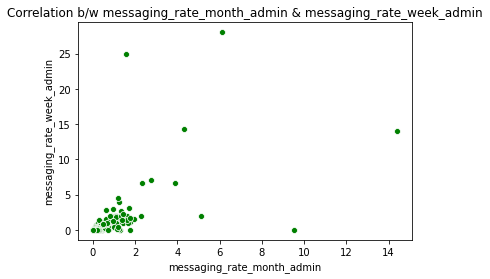

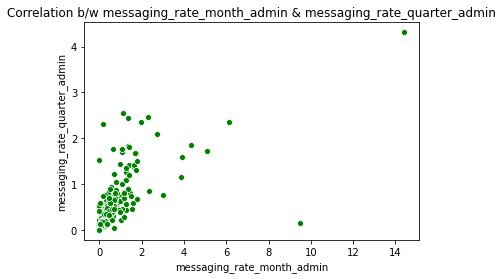

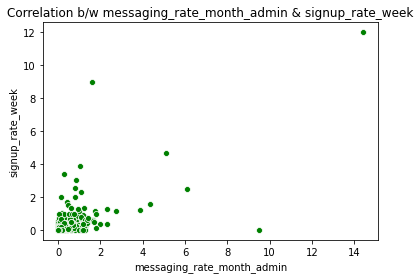

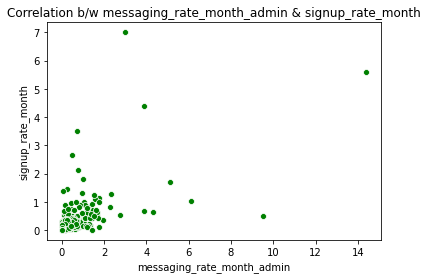

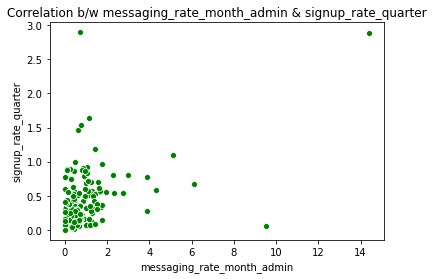

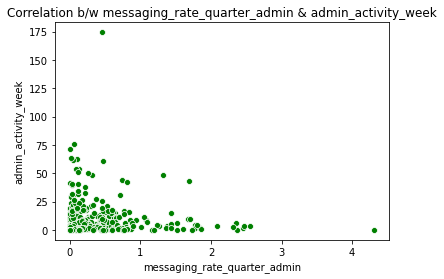

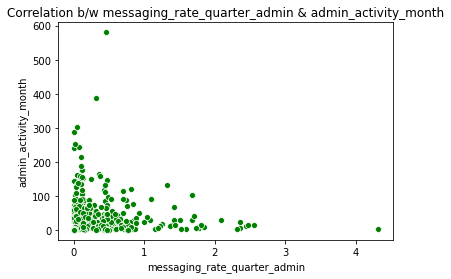

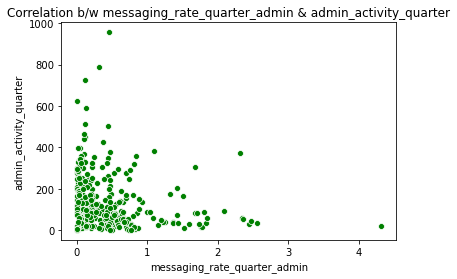

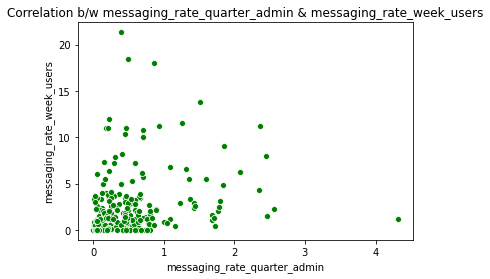

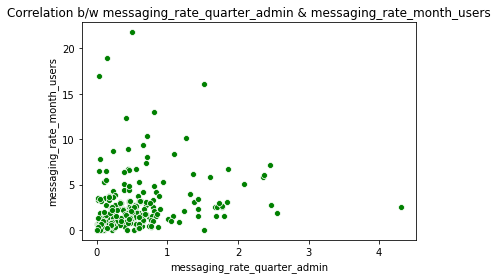

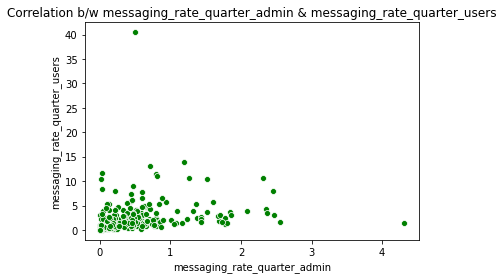

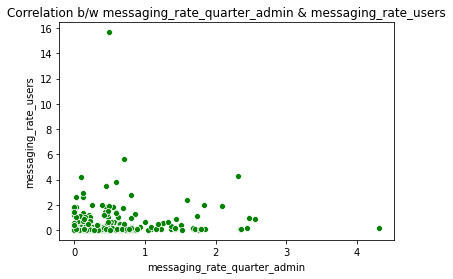

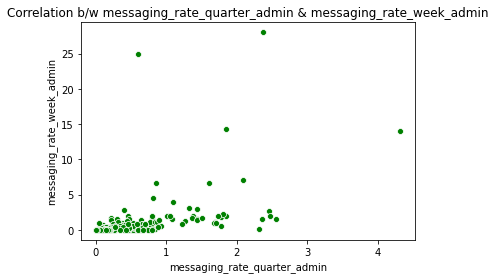

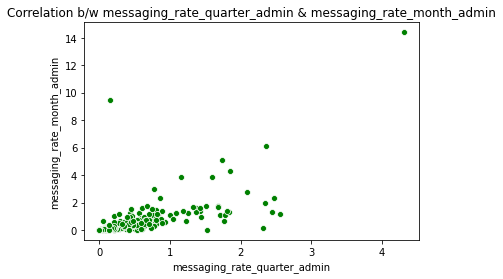

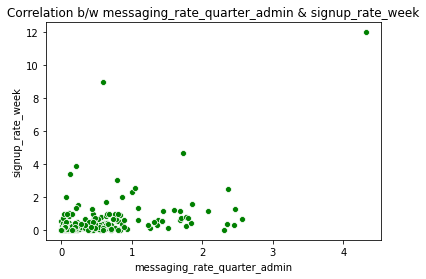

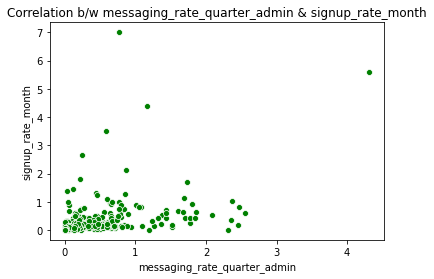

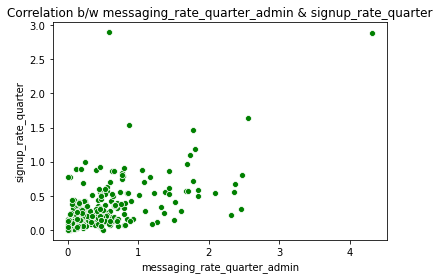

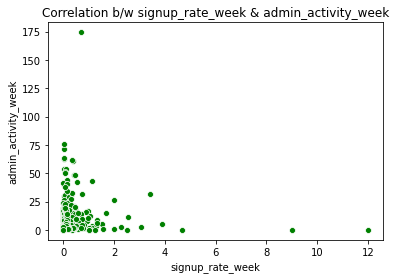

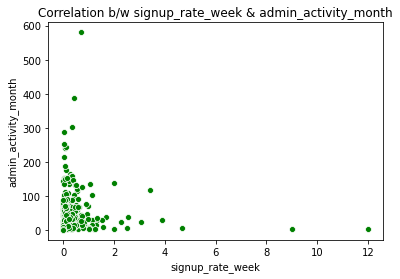

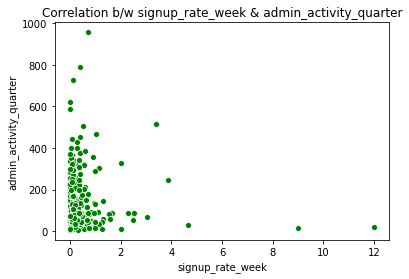

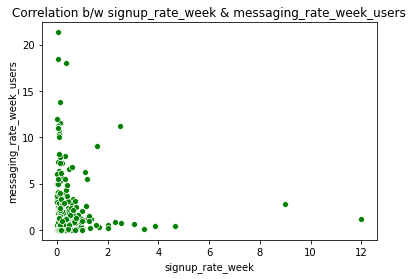

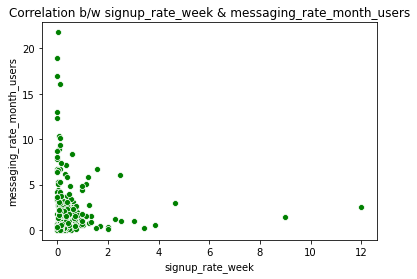

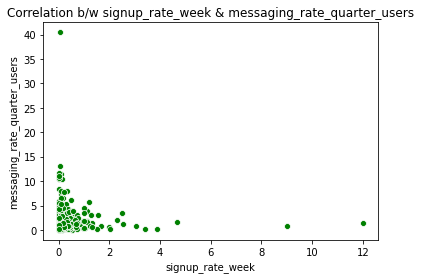

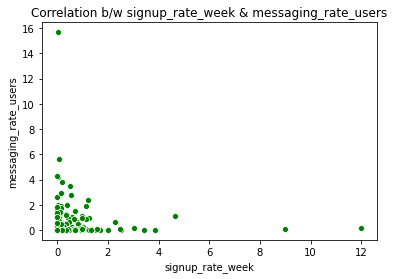

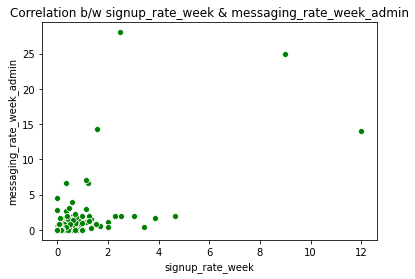

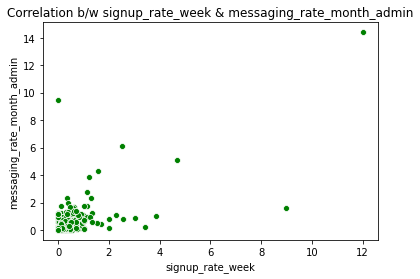

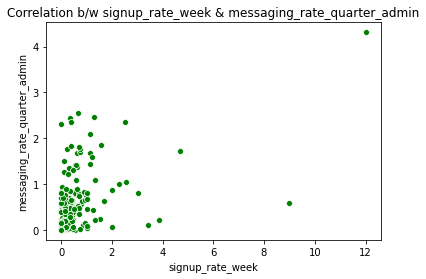

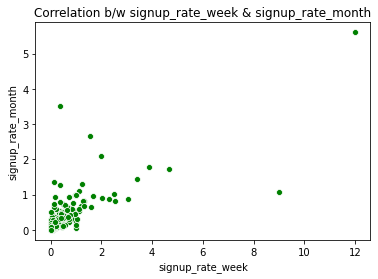

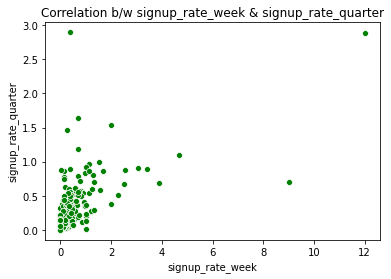

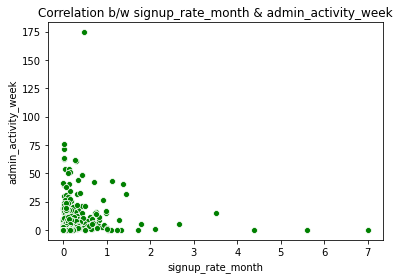

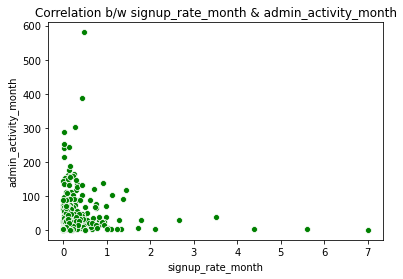

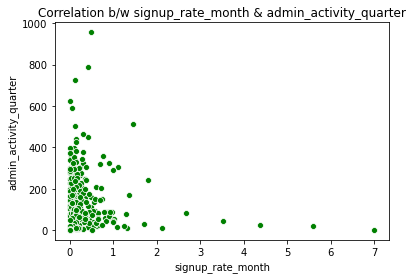

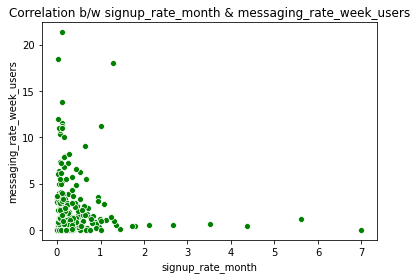

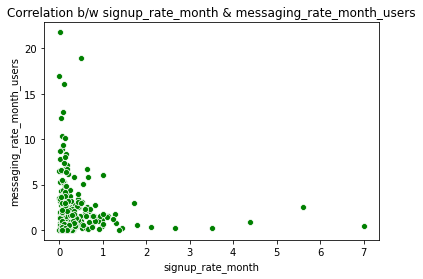

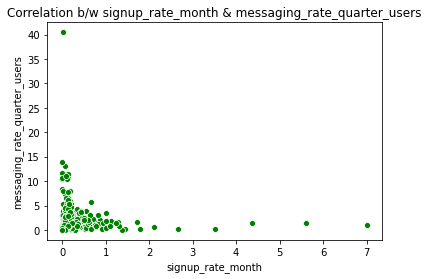

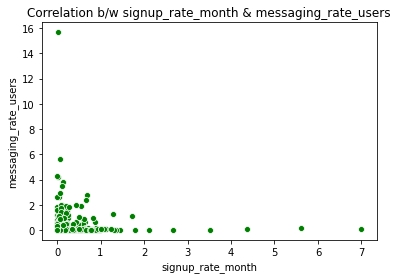

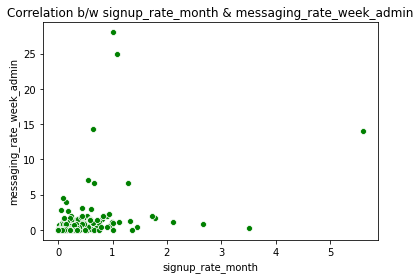

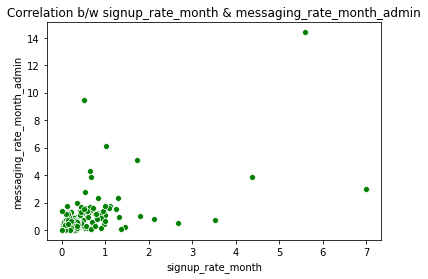

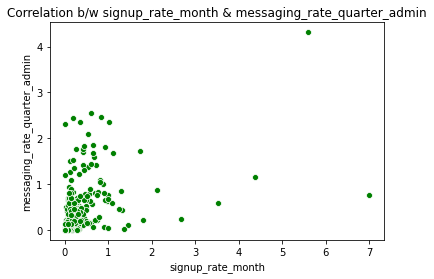

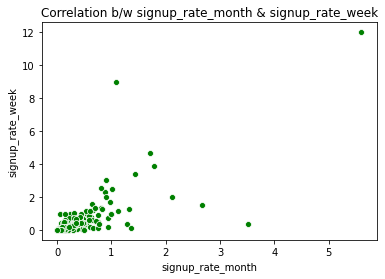

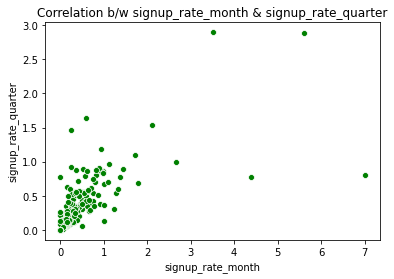

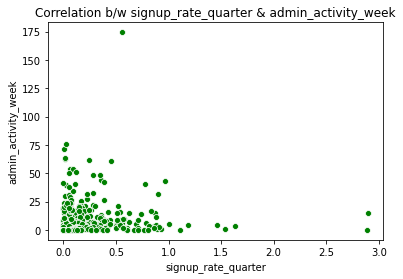

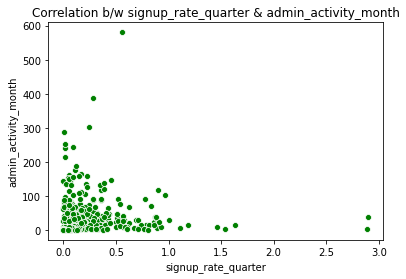

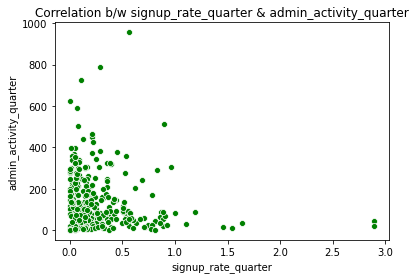

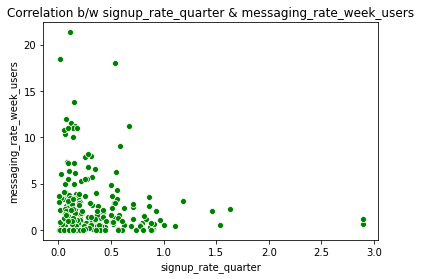

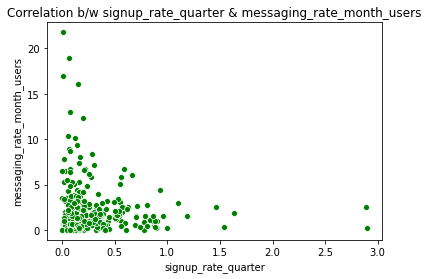

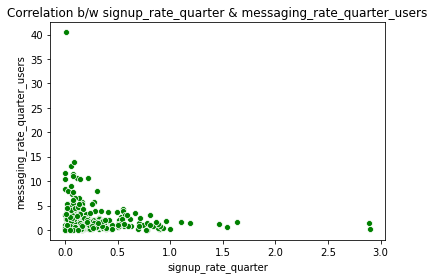

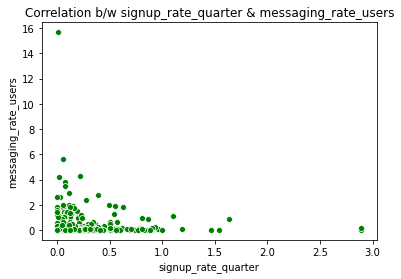

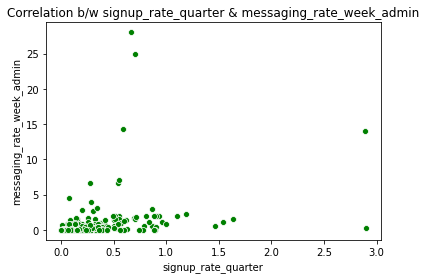

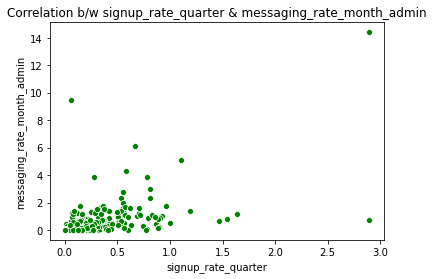

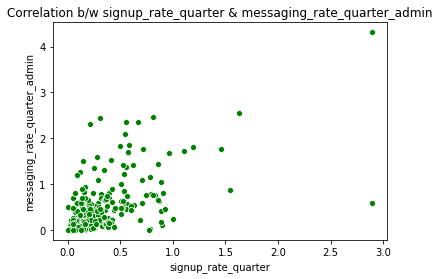

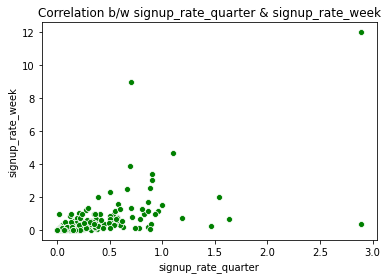

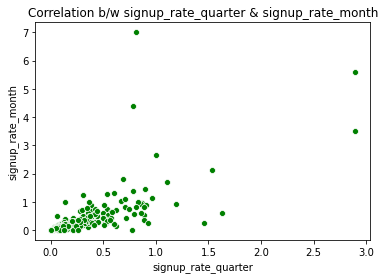

In [123]:
for i in a:
    for j in a:
        if i!=j:
            plt.title(f'Correlation b/w {i} & {j}')
            sns.scatterplot(df[i],df[j],color='green')
            plt.show()

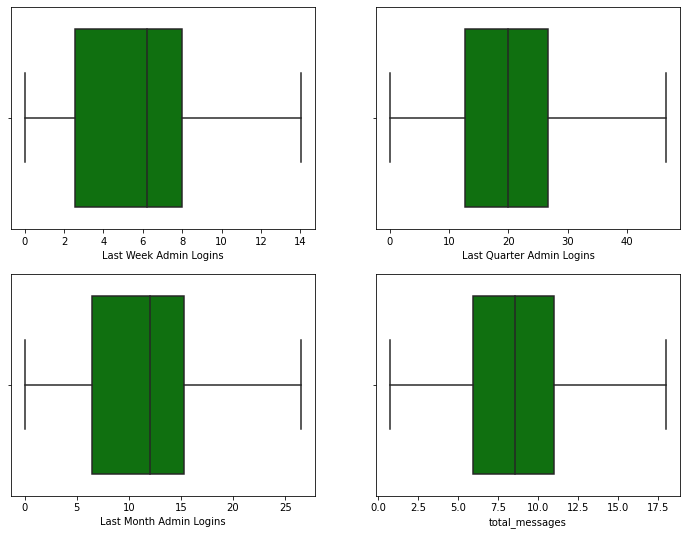

In [140]:
fig,ax = plt.subplots(2,2,figsize=(12,9))
sns.boxplot(df['Last Week Admin Logins'],ax=ax[0][0],color='green')
sns.boxplot(df['Last Quarter Admin Logins'],ax=ax[0][1],color='green')
sns.boxplot(df['Last Month Admin Logins'],ax=ax[1][0],color='green')
sns.boxplot(df['total_messages'],ax=ax[1][1],color='green')
plt.show()

In [137]:
for col in df.select_dtypes(exclude=['object','datetime64']).columns:
    df[col] = df[col].apply(lambda x : x+1 )
df.head()

imported_users  joined_users  last_week_joined  last_month_joined  \
3          59575.0        3815.0             613.0             1396.0   
7         455105.0       72361.0             313.0              846.0   
5           1195.0        9170.0             424.0             1508.0   
66          2435.0        3414.0              38.0              221.0   
26          3560.0         530.0              82.0              419.0   

    last_quarter_joined   id                   name  Number of Admins  \
3                2671.0  845             NetworkUSF               6.0   
7                5316.0   40       UMGC CareerQuest              38.0   
5                2241.0  371  Tri-Mentoring Program              19.0   
66                281.0  534        Honors Carolina              16.0   
26                432.0  326            LSA Connect              15.0   

   Last Admin Login  Last Week Admin Logins  ...  messaging_rate_month_users  \
3        2020-08-20                   873.0  ...                    2.037276   
7        2020-08-20                   792.0  ...                    2.372781   
5        2020-08-20                   766.0  ...                    3.063703   
66       2020-08-19                   759.0  ...                    3.768182   
26       2020-08-20                   756.0  ...                    1.899522   

    messaging_rate_quarter_users  messaging_rate_users  \
3                       1.822097              1.035653   
7                       2.016933              1.088097   
5                       3.075000              3.792821   
66                      5.785714              2.981529   
26                      1.900232              1.216732   

    messaging_rate_week_admin  messaging_rate_month_admin  \
3                    1.982798                    1.498450   
7                    1.250316                    1.339777   
5                    1.949020                    2.431860   
66                   1.201847                    1.270546   
26                   1.162914                    1.109845   

    messaging_rate_quarter_admin  signup_rate_week  signup_rate_month  \
3                       1.458917          1.701835           1.480537   
7                       1.530839          1.394437           1.247510   
5                       1.808207          1.552941           1.693831   
66                      1.253740          1.048813           1.097734   
26                      1.081223          1.107285           1.122115   

    signup_rate_quarter  week  
3              1.558227    35  
7              1.522000    35  
5              1.389497    35  
66             1.053020    35  
26             1.090224    35  

[5 rows x 33 columns]

In [138]:
from scipy import stats 
for col in df.drop(['id','name','Last Admin Login'],1).columns:
    df[col] ,lambda_value = stats.boxcox(df[col])
df.head()

imported_users  joined_users  last_week_joined  last_month_joined  \
3        26.361711     11.692083          4.398137           8.503354   
7        37.480991     18.125923          4.086189           7.825706   
5        12.177449     13.453247          4.230339           8.609080   
66       14.213408     11.477776          2.916691           6.080238   
26       15.386447      8.153800          3.379729           6.899421   

    last_quarter_joined   id                   name  Number of Admins  \
3             13.357889  845             NetworkUSF          1.591637   
7             15.261365   40       UMGC CareerQuest          2.874710   
5             12.897786  371  Tri-Mentoring Program          2.429922   
66             8.148951  534        Honors Carolina          2.313061   
26             9.035178  326            LSA Connect          2.268469   

   Last Admin Login  Last Week Admin Logins  ...  messaging_rate_month_users  \
3        2020-08-20               14.040169  ...                   48.895896   
7        2020-08-20               13.680532  ...                  178.218786   
5        2020-08-20               13.558808  ...                 1554.252349   
66       2020-08-19               13.525469  ...                 8975.706773   
26       2020-08-20               13.511104  ...                   26.966338   

    messaging_rate_quarter_users  messaging_rate_users  \
3                      18.919248              0.033075   
7                      44.900878              0.073645   
5                    1603.486235              0.298039   
66                 339467.997577              0.293603   
26                     27.052285              0.144228   

    messaging_rate_week_admin  messaging_rate_month_admin  \
3                   38.839458                    3.513347   
7                    0.665345                    1.288807   
5                   33.561755                  219.531922   
66                   0.442369                    0.779455   
26                   0.305936                    0.167381   

    messaging_rate_quarter_admin  signup_rate_week  signup_rate_month  \
3                       2.777285         10.557038           3.161583   
7                       4.234623          1.856094           0.650576   
5                      17.724185          4.796680          10.139065   
66                      0.683706          0.058717           0.142045   
26                      0.110705          0.161850           0.195245   

    signup_rate_quarter          week  
3              4.940223  42925.529143  
7              4.026234  42925.529143  
5              1.797622  42925.529143  
66             0.064816  42925.529143  
26             0.127350  42925.529143  

[5 rows x 33 columns]

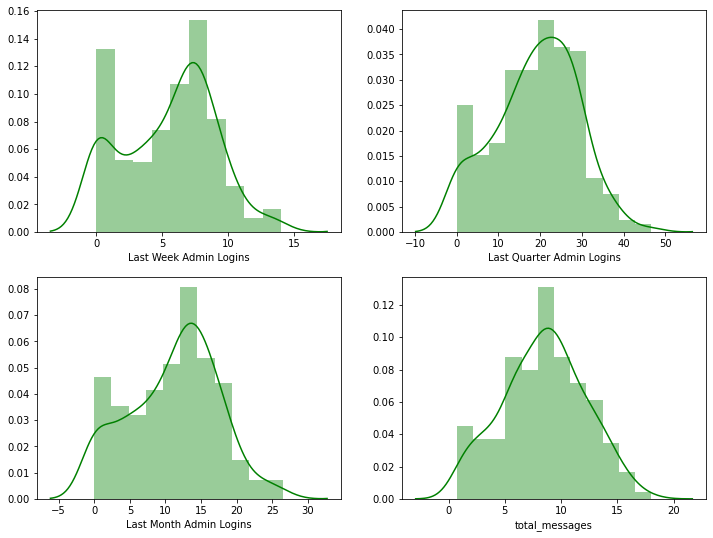

In [139]:
fig,ax = plt.subplots(2,2,figsize=(12,9))
sns.distplot(df['Last Week Admin Logins'],ax=ax[0][0],color='green')
sns.distplot(df['Last Quarter Admin Logins'],ax=ax[0][1],color='green')
sns.distplot(df['Last Month Admin Logins'],ax=ax[1][0],color='green')
sns.distplot(df['total_messages'],ax=ax[1][1],color='green')
plt.show()